# Homework 3

**Due: 03/12/2020**

## References

+ Chapter 1, 2 from the [Bishop textbook](http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf).
+ Lectures 12, 13 (inclusive).



## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you can either:
    
    - Type the answer using the built-in latex capabilities. In this case, simply export the notebook as a pdf and upload it on gradescope; or
    - You can print the notebook (after you are done with all the code), write your answers by hand, scan, turn your response to a single pdf, and upload on gradescope.


## Student details

+ **First Name: Parveen**
+ **Last Name: Dhillon**
+ **Email: <pdhillon@purdue.edu>**

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set_context('paper')
sns.set_style('white')
sns.set()
import scipy.stats as st
from sklearn.datasets import make_spd_matrix
import scipy

# Problem 1

Suppose you conduct some experiments and collect a dataset of $N$ pairs of input and target variables, $\mathcal{D} = (x_{1:N}, y_{1:N})$, where $x_i \in \mathbb{R}$ and $y_i \in \mathbb{R}$, $\forall i$. 
Assume a Gaussian likelihood with the mean being a generalized linear model with weights $\mathbf{w}\in\mathbb{R}^m$ and basis functions $\boldsymbol{\phi}(x)\in\mathbb{R}^M$, and the noise variance being a constant $\sigma^2$.
On the weights, use an isotropic Gaussian prior, with precision parameter, $\alpha$.

1. Derive expressions for $\mathbf{m}_{N}$ and $\mathbf{S}_{N}$, the posterior mean and covariance of the model parameters respectively. Ask the question: What do I know about the weights given all the data I have seen? You will need Bayes rule for updating the weights and little bit of algebra. In particular, you will need a trick called "completing the square."

2. Use the results from part 1 to derive the posterior predictive distribution at an arbitrary test input $x^{*}$. Ask the question: What do I know about the $y^*$ at $x^*$ given all the data I have seen? You will need the sum rule of probability theory to connect this question to the likelihood and the posterior you obtained in step 1.

3. Suppose now you perform an additional experiment and receive a data-point, $\mathcal{D}_{N+1}=(x_{N+1}, y_{N+1})$. Using the current posterior distribution over the parameters as the new prior, show that updating the model with the $(N+1)^{th}$ data-point results in the same posterior distribution shown above, with $N$ replaced by $N+1$.

The required expressions for all  of the above cases are well-known in closed form. It is, however, useful to work through the algebra at least once. Feel free to consult Bishop's book, but in the end present your own derivation from scratch.

## Posterior mean and covariance of the model parameters

+ Model the data $\mathcal{D} = (x_{1:N}, y_{1:N})$ using $ m$ fixed basis/features:
\begin{gather*}
y(\mathbf{x};\mathbf{w}) = \sum_{j=1}^{m} w_{j}\phi_{j}(\mathbf{x}) = \mathbf{w^{T}\boldsymbol{\phi}(\mathbf{x})}\\ \text{where }
\mathbf{x}\in\mathbb{R}^N \text{(inputs) } ; \mathbf{w}\in\mathbb{R}^M \text{(weights) ;} \boldsymbol{\phi}(x)\in\mathbb{R}^M \text{(basis vector)}\\
\mathbf{y}(\mathbf{x};\mathbf{w}) = \boldsymbol{\Phi}\mathbf{w}\\
\text{where } \mathbf{y}\in\mathbb{R}^N \text{(outputs or target variables) ;} \boldsymbol{\Phi} \in \mathbb{R}^{N \times M} \text{(design matrix)}
\end{gather*}

+ Gaussian **Likelihood** based on above given assumption:
\begin{gather*}
\mathbf{y}_{1:N} | \mathbf{x}_{1:N}, \mathbf{w}, \sigma \sim p(\mathbf{y}|\mathbf{x},\mathbf{w},\sigma) \sim N(\mathbf{y}|\boldsymbol{\Phi}\mathbf{w}, \sigma^2\mathbf{I})\\
\text{where } \sigma^2 \text{: (likelihood noise variance)} \end{gather*}
\begin{align*}
N(\mathbf{y}|\boldsymbol{\Phi}\mathbf{w}, \sigma^2\mathbf{I}) &= \det(2\pi\sigma^{2}I)^{-1/2} \exp\left( -\frac{1}{2}(\mathbf{y}-\boldsymbol{\Phi}\mathbf{w})^T (\sigma^2\mathbf{I})^{-1} (\mathbf{y}-\boldsymbol{\Phi}\mathbf{w}) \right) \\
&= (2\pi\sigma^2)^{-N/2} \exp\left( -\frac{1}{2\sigma^2}(\mathbf{y}-\boldsymbol{\Phi}\mathbf{w})^T (\mathbf{y}-\boldsymbol{\Phi}\mathbf{w}) \right)
\end{align*}
+ Model the uncertainty in the model parameters using a isotropic Gaussian **prior**:
\begin{gather*}
\mathbf{w}|\alpha \sim p(\mathbf{w}|\alpha) \sim \mathcal{N}(\mathbf{w}|0,\alpha^{-1}\mathbf{I})\\
\text{where } \alpha \text{: (prior precision)} \end{gather*}
\begin{align*}
\mathcal{N}(\mathbf{w}|0,\alpha^{-1}\mathbf{I}) &= \det(2\pi\alpha^{-1}I)^{-1/2} \exp\left( -\frac{1}{2}(\mathbf{w}-\mathbf{0})^T (\alpha^{-1}\mathbf{I})^{-1} (\mathbf{w}-\mathbf{0}) \right)\\
&= (2\pi\alpha^{-1})^{-M/2} \exp\left( -\frac{\alpha}{2}\mathbf{w}^T \mathbf{w} \right)
\end{align*}
+ Posterior using Bayes' rule:
\begin{align*}
p(\mathbf{w}|\mathcal{D}, \sigma,\alpha) 
&= \frac{p(\mathbf{y}_{1:N}|\mathbf{x}_{1:N}, \mathbf{w}, \sigma)p(\mathbf{w}|\alpha)}
{\int p(\mathbf{y}_{1:N}|\mathbf{x}_{1:N}, \mathbf{w}', \sigma)p(\mathbf{w}'|\alpha)d\mathbf{w}'} \\
&= \frac{\text{likelihood} \times \text{prior}}{\text{normalization constant}} \\
&\propto p(\mathbf{y}|\mathbf{x}, \mathbf{w}, \sigma)p(\mathbf{w}|\alpha) \\
&\propto N(\mathbf{y}|\boldsymbol{\Phi}\mathbf{w}, \sigma^2\mathbf{I}) \mathcal{N}(\mathbf{w}|0,\alpha^{-1}\mathbf{I}) \\
&\propto (2\pi\sigma^2)^{-N/2} \exp\left( -\frac{1}{2\sigma^2}(\mathbf{y}-\boldsymbol{\Phi}\mathbf{w})^T (\mathbf{y}-\boldsymbol{\Phi}\mathbf{w}) \right) (2\pi\alpha^{-1})^{-M/2} \exp\left( -\frac{\alpha}{2}\mathbf{w}^T \mathbf{w} \right)\\
&\propto \exp\left( -\frac{1}{2\sigma^2}(\mathbf{y}-\boldsymbol{\Phi}\mathbf{w})^T (\mathbf{y}-\boldsymbol{\Phi}\mathbf{w}) \right) \exp\left( -\frac{\alpha}{2}\mathbf{w}^T \mathbf{w} \right) \\
&\propto  \exp\left( -\frac{\alpha}{2}\mathbf{w}^T \mathbf{w} -\frac{1}{2\sigma^2}(\mathbf{y}-\boldsymbol{\Phi}\mathbf{w})^T (\mathbf{y}-\boldsymbol{\Phi}\mathbf{w}) \right) \\
&\propto \exp\left( -\frac{\alpha}{2}\mathbf{w}^T \mathbf{w} -\frac{\sigma^{-2}}{2} \left(\mathbf{y}^T\mathbf{y} + \mathbf{w}^T\boldsymbol{\Phi}^T\boldsymbol{\Phi} \mathbf{w} -2\mathbf{w}^T\boldsymbol{\Phi}^T\mathbf{y} \right) \right)\\
&\propto \exp\left( -\frac{1}{2}\mathbf{w}^T(\alpha\mathbf{I}+\sigma^{-2}\boldsymbol{\Phi}^T\boldsymbol{\Phi}) \mathbf{w} + \mathbf{w}^T\sigma^{-2}\boldsymbol{\Phi^T}\mathbf{y} - \frac{\sigma^{-2}}{2} \mathbf{y}^T\mathbf{y} \right)\\
&\propto \exp\left( -\frac{1}{2}\mathbf{w}^T(\alpha\mathbf{I}+\sigma^{-2}\boldsymbol{\Phi}^T\boldsymbol{\Phi}) \mathbf{w} + \mathbf{w}^T\sigma^{-2}\boldsymbol{\Phi^T}\mathbf{y} - \frac{\sigma^{-2}}{2} \mathbf{y}^T\mathbf{y} \right)\\
\end{align*}

As can be seen from the above expression inside exponential that it is quadratic in $\mathbf{w}$, the above expression can be rearranged by completing the square similar to the expression inside exponential of a general multivariate Gaussian distribution of $\mathbf{w}$ with mean $\mathbf{m}_N$ and covariance $\mathbf{S}_N$ as given below. And also as both prior and likelihood are Gaussian, posterior which is their product would also be Gaussian. <br>
Multivariate Gaussian distribution of $\mathbf{w}$ is:
\begin{align*}
\mathcal{N}(\mathbf{w}|\mathbf{m}_N,\mathbf{S}_N) &= \det(2\pi\mathbf{S}_N)^{-1/2} \exp\left( -\frac{1}{2}(\mathbf{w}-\mathbf{m}_N)^T (\mathbf{S}_N)^{-1} (\mathbf{w}-\mathbf{m}_N) \right) \\
& \propto \exp\left( -\frac{1}{2}\mathbf{w}^T \mathbf{S}_N^{-1} \mathbf{w} + \mathbf{w}^T\mathbf{S}_N^{-1}\mathbf{m}_N - \frac{1}{2}\mathbf{m}_N^T\mathbf{S}_N^{-1}\mathbf{m}_N \right) 
\end{align*}
Then the posterior can be further rearranged by completing the square as:
\begin{align*}
p(\mathbf{w}|\mathcal{D}, \sigma,\alpha) 
&\propto \exp\left( -\frac{1}{2}\mathbf{w}^T(\alpha\mathbf{I}+\sigma^{-2}\boldsymbol{\Phi}^T\boldsymbol{\Phi}) \mathbf{w} + \mathbf{w}^T\sigma^{-2}\boldsymbol{\Phi^T}\mathbf{y} - \frac{\sigma^{-2}}{2} \mathbf{y}^T\mathbf{y} \right)\\
&\propto \exp\left(-\frac{1}{2}\mathbf{w}^T \mathbf{S}_N^{-1} \mathbf{w} + \mathbf{w}^T\mathbf{S}_N^{-1}\mathbf{m}_N - \frac{1}{2}\mathbf{m}_N^T\mathbf{S}_N^{-1}\mathbf{m}_N + \frac{1}{2}\mathbf{m}_N^T\mathbf{S}_N^{-1}\mathbf{m}_N - \frac{\sigma^{-2}}{2} \mathbf{y}^T\mathbf{y} \right)\\
&\propto \exp\left(\underbrace{-\frac{1}{2}\mathbf{w}^T \mathbf{S}_N^{-1} \mathbf{w} + \mathbf{w}^T\mathbf{S}_N^{-1}\mathbf{m}_N - \frac{1}{2}\mathbf{m}_N^T\mathbf{S}_N^{-1}\mathbf{m}_N}_{\text{quadratic function of $\mathbf{w}$}} \right) 
\exp\left(\underbrace{\frac{1}{2}\mathbf{m}_N^T\mathbf{S}_N^{-1}\mathbf{m}_N - \frac{\sigma^{-2}}{2} \mathbf{y}^T\mathbf{y}}_{\text{constant}} \right)\\
\end{align*}
Comparing the first two terms of above expressions we get posterior mean and covariance of the model parameters as:
\begin{align*} 
\mathbf{S}_N^{-1} = \alpha\mathbf{I}+\sigma^{-2}\boldsymbol{\Phi}^T\boldsymbol{\Phi} \Rightarrow 
& \mathbf{S}_N = (\alpha\mathbf{I}+\sigma^{-2}\boldsymbol{\Phi}^T\boldsymbol{\Phi})^{-1}\\
\mathbf{S}_N^{-1}\mathbf{m}_N = \sigma^{-2}\boldsymbol{\Phi^T}\mathbf{y} \Rightarrow
\mathbf{m}_N = \sigma^{-2} \mathbf{S}_N \boldsymbol{\Phi^T}\mathbf{y} \Rightarrow
& \mathbf{m}_N = \sigma^{-2} (\alpha\mathbf{I}+\sigma^{-2}\boldsymbol{\Phi}^T\boldsymbol{\Phi})^{-1} \boldsymbol{\Phi^T}\mathbf{y}
\end{align*}

## Posterior Predictive Distribution

The predictive distribution $y^*$ at a new arbitrary test input $x^{*}$ can be calculated using sum rule as,
$$
p(y^*|x^*,\mathcal{D},\sigma,\alpha)=\int{p(y^*,\mathbf{w}|x^*,\mathcal{D},\sigma,\alpha)d\mathbf{w}}
$$
Then using Bayes' rule:
\begin{align*}
p(y^*|x^*,\mathcal{D},\sigma,\alpha) &= \int{p(y^*|\mathbf{w},x^*,\mathcal{D},\sigma,\alpha) p(\mathbf{w}|\mathcal{D},\sigma,\alpha) d\mathbf{w}} \\
\Rightarrow p(y^*|\mathbf{w},x^*,\mathcal{D},\sigma,\alpha) &= \mathcal{N}(y^*|\mathbf{w}^T \boldsymbol{\phi}(x^*),\sigma^2) \text{ (Likelihood)}\\
&= \mathcal{N}(y^*|\boldsymbol{\phi}(x^*)^T \mathbf{w} ,\sigma^2) \text{ (rearranging)} \\ 
\Rightarrow p(\mathbf{w}|\mathcal{D},\sigma,\alpha)  &= \mathcal{N}(\mathbf{w}|\mathbf{m}_N,\mathbf{S}_N)  \text{ (Posterior)}
\end{align*}

As we can see that both likelihood and posterior are Gaussian distributions, and $y^*$ is linear in model parameters / weights $\mathbf{w}$, so the predictive distribution involves convolution of two Gaussian distributions. And as we can see from above expression that predictive distribution of $y^*$ i.e. $p(y^*|x^*,\mathcal{D},\sigma,\alpha)$ is a marginal distribution of $y^*$ from joint distribution of $y^*$ and $\mathbf{w}$ i.e. $p(y^*,\mathbf{w}|x^*,\mathcal{D},\sigma,\alpha)$. <br>
Then, based on the equations 2.113 to 2.115 from Bishop(2006) given as, <br>

" <br>
*Given a marginal Gaussian distribution for x and a conditional Gaussian distribution for y given x in the form*
\begin{align*}
p(\mathbf{x}) = \mathcal{N}(\mathbf{x}|\mathbf{\mu}, \mathbf{\Lambda}^{-1}) & \dots (2.113)\\
p(\mathbf{y|x}) = \mathcal{N}(\mathbf{y}|\mathbf{Ax + b}, \mathbf{L}^{-1}) & \dots (2.114)
\end{align*}
*the marginal distribution of y is given by*
\begin{align*}
p(\mathbf{y}) = \mathcal{N}(\mathbf{y}|\mathbf{A\mu} + \mathbf{b}, \mathbf{L}^{-1} + \mathbf{A\Lambda}^{-1}\mathbf{A}^T) & \dots (2.115)
\end{align*}
" <br>

Where, for here, the equivalent parameters as shown in the above equations are,
$$
\mathbf{\mu} = \mathbf{m}_N; \ \mathbf{\Lambda}^{-1}=\mathbf{S}_N; \
\mathbf{A} = \boldsymbol{\phi}(x^*)^T; \ \mathbf{b}=\mathbf{0}; \ \mathbf{L}^{-1} = \sigma^2
$$
The Posterior Predictive Distribution of $y^*$ is Gaussian which can we written as:
$$
p(y^*|x^*,\mathcal{D},\sigma,\alpha) = \mathcal{N}(y^*|m(x^*),S(x^*))
$$
where,
\begin{gather*}
m(x^*) = \mathbf{A\mu} + b = \mathbf{\phi}(x^*)^T \mathbf{m}_N + 0 = \mathbf{m}_N^T\mathbf{\phi}(x^*) \\
S(x^*) = L^{-1} + \mathbf{A}\mathbf{\Lambda}^{-1}\mathbf{A}^T = \sigma^2 + \boldsymbol{\phi}(x^*)^T \mathbf{S}_N   (\mathbf{\phi}(x^*)^T)^T = \sigma^2 + \mathbf{\phi}(x^*)^T \mathbf{S}_N \mathbf{\phi}(x^*)
\end{gather*}
So the Posterior Predictive Distribution of $y^*$ is:
$$
p(y^*|x^*,\mathcal{D},\sigma,\alpha) = \mathcal{N}\left(y^*|\mathbf{m}_N^T\mathbf{\phi}(x^*),\sigma^2 + \mathbf{\phi}(x^*)^T \mathbf{S}_N \mathbf{\phi}(x^*) \right)
$$

## Posterior after updating the model with the $(N+1)^{th}$ data-point 

+ Prior on model parameters:
$$
p(\mathbf{w}|\mathbf{m}_N,\mathbf{S}_N) \sim \mathcal{N}(\mathbf{w}|\mathbf{m}_N,\mathbf{S}_N)
$$
+ Model (Same as Part 1):
$$
y(x;\mathbf{w}) = \sum_{j=1}^{m} w_{j}\phi_{j}(x) = \mathbf{w^{T}}\boldsymbol{\phi}(x) \\ 
$$
+ Likelihood (Same as Part 1):
$$
p(y|x,\mathbf{w},\sigma) \sim N(y|\mathbf{w}^T\boldsymbol{\phi}(x), \sigma^2)
$$
+ So, Posterior using Bayes' Rule:
\begin{align*}
p(\mathbf{w}|\mathcal{D}_{N+1}, \sigma,\mathbf{m}_N,\mathbf{S}_N) &= \frac{p(y_{N+1}|x_{N+1}, \mathbf{w}, \sigma) p(\mathbf{w}|\mathbf{m}_N,\mathbf{S}_N)} {\int p(y_{N+1}|x_{N+1}, \mathbf{w}', \sigma) p(\mathbf{w}'|\mathbf{m}_N,\mathbf{S}_N) d\mathbf{w}'} \\
&\propto N(y_{N+1}|\mathbf{w}^T\boldsymbol{\phi}(x_{N+1}), \sigma^2) \mathcal{N}(\mathbf{w}|\mathbf{m}_N,\mathbf{S}_N) \\
&\propto N(y_{N+1}|\boldsymbol{\phi}(x_{N+1})^T\mathbf{w}, \sigma^2) \mathcal{N}(\mathbf{w}|\mathbf{m}_N,\mathbf{S}_N) \\
&\propto \exp\left( -\frac{1}{2\sigma^2} (y_{N+1}-{\boldsymbol{\phi}(x_{N+1})}^T \mathbf{w})^T (y_{N+1} - {\boldsymbol{\phi}(x_{N+1})}^T \mathbf{w})  \right) \times \\
& \ \  \exp\left( -\frac{1}{2} \mathbf{w}^T \mathbf{S}_N^{-1} \mathbf{w} + \mathbf{w}^T\mathbf{S}_N^{-1}\mathbf{m}_N - \frac{1}{2} \mathbf{m}_N^T \mathbf{S}_N^{-1} \mathbf{m}_N \right) \\
&\propto \exp\left(-\frac{1}{2\sigma^2}y_{N+1}^2 -\frac{1}{2\sigma^2}\mathbf{w}^T \boldsymbol{\phi}(x_{N+1}) \boldsymbol{\phi}(x_{N+1})^T\mathbf{w} + \frac{1}{\sigma^2}\mathbf{w}^T\boldsymbol{\phi}(x_{N+1})y_{N+1} \right) \times \\
& \ \ \exp\left( -\frac{1}{2}\mathbf{w}^T \mathbf{S}_N^{-1} \mathbf{w} + \mathbf{w}^T\mathbf{S}_N^{-1}\mathbf{m}_N - \frac{1}{2}\mathbf{m}_N^T\mathbf{S}_N^{-1}\mathbf{m}_N \right) \\
&\propto \exp\left( -\frac{1}{2}\mathbf{w}^T(\mathbf{S}_N^{-1}+\sigma^{-2}\boldsymbol{\phi}(x_{N+1}) \boldsymbol{\phi}(x_{N+1})^T)\mathbf{w} + 
\mathbf{w}^T(\mathbf{S}_N^{-1}\mathbf{m}_N + \sigma^{-2}\boldsymbol{\phi}(x_{N+1})y_{N+1})\right)
\end{align*}
Similar to part 1, here also as both the prior and likelihood are Gaussian, posterior which is their product would be Gaussian, which can be seen from the above expression inside exponential as it is quadratic in $\mathbf{w}$. Comparing the above expression to the expression inside exponential of a general multivariate Gaussian distribution of $\mathbf{w}$ with mean $\mathbf{m}_O$ and covariance $\mathbf{S}_O$ as given by,
\begin{align*}
\mathcal{N}(\mathbf{w}|\mathbf{m}_O,\mathbf{S}_O) &= \det(2\pi\mathbf{S}_O)^{-1/2} \exp\left( -\frac{1}{2}(\mathbf{w}-\mathbf{m}_O)^T (\mathbf{S}_O)^{-1} (\mathbf{w}-\mathbf{m}_O) \right) \\
&\propto \exp\left( -\frac{1}{2}\mathbf{w}^T \mathbf{S}_O^{-1} \mathbf{w} + \mathbf{w}^T\mathbf{S}_O^{-1}\mathbf{m}_O - \frac{1}{2}\mathbf{m}_O^T\mathbf{S}_O^{-1}\mathbf{m}_O \right)
\end{align*}
Similar to part 1, comparing the first two terms of above two expression after completing the square we get posterior mean and covariance of the model parameters as:
$$
\mathbf{S}_O^{-1} = \mathbf{S}_N^{-1}+\sigma^{-2}\boldsymbol{\phi}(x_{N+1}) \boldsymbol{\phi}(x_{N+1})^T
$$
where from part 1:
$$
\mathbf{S}_N^{-1} = \alpha\mathbf{I}+\sigma^{-2}\boldsymbol{\Phi}^T\boldsymbol{\Phi}
$$
So posterior variance inverse,
\begin{gather*}
\mathbf{S}_O^{-1} = \alpha\mathbf{I}+\sigma^{-2}\boldsymbol{\Phi}^T\boldsymbol{\Phi} + \sigma^{-2}\boldsymbol{\phi}(x_{N+1}) \boldsymbol{\phi}(x_{N+1})^T \\
= \alpha\mathbf{I}+\sigma^{-2} \begin{bmatrix} \boldsymbol{\phi}(x_1) & \boldsymbol{\phi}(x_2) & \boldsymbol{\phi}(x_3) \dots \boldsymbol{\phi}(x_N) \end{bmatrix} \begin{bmatrix} \boldsymbol{\phi}(x_1) & \boldsymbol{\phi}(x_2) & \boldsymbol{\phi}(x_3) \dots \boldsymbol{\phi}(x_N) \end{bmatrix}^T + \sigma^{-2}\boldsymbol{\phi}(x_{N+1}) \boldsymbol{\phi}(x_{N+1})^T \\
= \alpha\mathbf{I}+\sigma^{-2}\boldsymbol{\Phi'}^T\boldsymbol{\Phi'}
\end{gather*}
where,
$$
\boldsymbol{\Phi'} \in \mathbb{R}^{(N+1) \times M} \ \text{(Design matrix with N+1 inputs including the latest one)}
$$
Hence,
$$
\mathbf{S}_O^{-1} = \alpha\mathbf{I}+\sigma^{-2}\boldsymbol{\Phi'}^T\boldsymbol{\Phi'} = \mathbf{S}_{N+1}^{-1}
$$
Similar comparing the 2nd term for mean we get,
$$
\mathbf{S}_O^{-1}\mathbf{m}_O = \mathbf{S}_N^{-1}\mathbf{m}_N + \sigma^{-2}\boldsymbol{\phi}(x_{N+1})y_{N+1}
$$
where from part 1:
$$
\mathbf{S}_N^{-1}\mathbf{m}_N = \sigma^{-2}\boldsymbol{\Phi^T}\mathbf{y}
$$
So the posterior mean get as,
\begin{gather*}
\mathbf{S}_O^{-1}\mathbf{m}_O = \sigma^{-2}\boldsymbol{\Phi^T}\mathbf{y} +  \sigma^{-2}\boldsymbol{\phi}(x_{N+1})y_{N+1} \\
= \sigma^{-2} \begin{bmatrix} \boldsymbol{\phi}(x_1) & \boldsymbol{\phi}(x_2) & \boldsymbol{\phi}(x_3) \dots \boldsymbol{\phi}(x_N)\end{bmatrix} \begin{bmatrix} y_{1} & y_{2} & y_{3} \dots y_{N}\end{bmatrix}^T + \sigma^{-2}\boldsymbol{\phi}(x_{N+1})y_{N+1} \\
= \sigma^{-2} \boldsymbol{\Phi'^T}\mathbf{y'}
\end{gather*}
where,
\begin{gather*}
\boldsymbol{\Phi'} \in \mathbb{R}^{(N+1) \times M} \ \text{(Design matrix with N+1 inputs including the latest one)} \\
\mathbf{y'} \in \mathbb{R}^{(N+1)} \ \text{(Output vector with all N+1 outputs)}
\end{gather*}
And as $\mathbf{S}_O^{-1} = \mathbf{S}_{N+1}^{-1}$, so we get,
$$
\mathbf{m}_O = \sigma^{-2} \mathbf{S}_{N+1} \boldsymbol{\Phi'^T}\mathbf{y'} = \mathbf{m}_{N+1}
$$
So with the prior on model parameters as
$$
p(\mathbf{w}|\mathbf{m}_N,\mathbf{S}_N) \sim \mathcal{N}(\mathbf{w}|\mathbf{m}_N,\mathbf{S}_N)
$$
we have shown that based on the updated data model with 1 more data point, the posterior is similar to prior with updated mean and covariance as
\begin{gather*}
p(\mathbf{w}|\mathcal{D}_{N+1}, \sigma,\mathbf{m}_N,\mathbf{S}_N) = \mathcal{N}(\mathbf{w}|\mathbf{m}_O,\mathbf{S}_O)\\
\text{where, } \mathbf{m}_O = \mathbf{m}_{N+1} \ ; \ \mathbf{S}_O = \mathbf{S}_{N+1}
\end{gather*}


# Problem 2

[Conjugate priors](https://en.wikipedia.org/wiki/Conjugate_prior) are an extremely useful tool in Bayesian inference.
If the posterior distribution over the unknown parameters, $\boldsymbol{\theta}$, of a statistical model is in the same family  of distributions as the prior, the prior  is said to be conjugate to the chosen likelihood. We saw one such example in class where a Gaussian prior over the unknown weights of the linear regression model lead to a Gaussian posterior under the Gaussian likelihood model. We used a fixed value of $\sigma^2$ in our analysis of the linear regression model in class.

As before, consider a Gaussian likelihood with the mean being a generalized linear model with weights $\mathbf{w}\in\mathbb{R}^m$ and basis functions $\boldsymbol{\phi}(x)\in\mathbb{R}^M$, and the noise variance being a constant $\sigma^2$
Let's treat the noise parameter also as an unknown. Let $\beta$ be the inverse noise variance, i.e., $\beta = \frac{1}{\sigma^2}$ $^{(1)}$. 
Show that the following prior over $w$ and $\beta$:
$$
p(\mathbf{w}, \beta) = \mathcal{N}(\mathbf{w}|0, (\alpha \beta)^{-1}\mathbf{I}) \mathrm{Gamma}(\beta| a_0, b_0),
$$
is conjugate.
That is, show that the posterior over $\mathbf{w}$ and $\beta$ has the same form as the prior: 
$$p(\mathbf{w}, \beta|\mathcal{D}_N, \alpha) = \mathcal{N}(w|\beta, \mathbf{m}_N, \mathbf{S}_N) \mathrm{Gamma}(\beta| a_N, b_N).$$
In doing so, recover the expressions for $\mathbf{m}_N$, $\mathbf{S}_N$, $a_N$ and $b_N$. Discuss any interesting observation you make about the form of the posterior distribution parameters.

The [Gamma distribution](https://en.wikipedia.org/wiki/Gamma_distribution) has probability density:
$$
\mathrm{Gamma}(\beta|a_0, b_0) = \frac{b_0^{a_0}}{\Gamma(a)}\beta^{a_0-1}e^{-b_0\beta}
$$

(1) - _You will frequently encounter in literature the use of the precision rather than the variance when using the normal distribution. Doing so often simplifies computation_.

### Solution:
+ Model the data $\mathcal{D} = (x_{1:N}, y_{1:N})$ using $m$ fixed basis/features:
\begin{gather*}
y(x;\mathbf{w}) = \sum_{j=1}^{m} w_{j}\phi_{j}(x) = \mathbf{w}^T\boldsymbol{\phi}(x) \\ 
\text{where } x\in\mathbb{R} \text{(input) } ; \mathbf{w}\in\mathbb{R}^M \text{(weights) }; \boldsymbol{\phi}(x)\in\mathbb{R}^M \text{(basis functions)} \\
\mathbf{y}(\mathbf{x};\mathbf{w}) = \boldsymbol{\Phi}\mathbf{w} \\
\text{where } \mathbf{x,y}\in\mathbb{R}^N \text{(inputs and outputs or target variables) } ;\boldsymbol{\Phi} \in \mathbb{R}^{N \times M} \text{(design matrix)}
\end{gather*}

+ Gaussian **Likelihood** based on above given assumption:
\begin{gather*}
\mathbf{y}_{1:N} | \mathbf{x}_{1:N}, \mathbf{w}, \beta \sim p(\mathbf{y}|\mathbf{x},\mathbf{w},\beta) \sim N(\mathbf{y}|\boldsymbol{\Phi}\mathbf{w}, \beta^{-1}\mathbf{I})\\
\text{where } \beta = \frac{1}{\sigma^2} \text{: (inverse of likelihood noise variance)}
\end{gather*}

\begin{align*}
N(\mathbf{y}|\boldsymbol{\Phi}\mathbf{w}, \beta^{-1}\mathbf{I}) &= \det(2\pi\beta^{-1}\mathbf{I})^{-1/2} \exp\left( -\frac{1}{2}(\mathbf{y}-\boldsymbol{\Phi}\mathbf{w})^T (\beta^{-1}\mathbf{I})^{-1} (\mathbf{y}-\boldsymbol{\Phi}\mathbf{w}) \right) \\
&= (2\pi\beta^{-1})^{-N/2} \exp\left( -\frac{\beta}{2}(\mathbf{y}-\boldsymbol{\Phi}\mathbf{w})^T (\mathbf{y}-\boldsymbol{\Phi}\mathbf{w}) \right) \\
&\propto \beta^{N/2} \exp\left( -\frac{\beta}{2}(\mathbf{y}-\boldsymbol{\Phi}\mathbf{w})^T (\mathbf{y}-\boldsymbol{\Phi}\mathbf{w}) \right) \\
&\propto \beta^{N/2} \exp\left( -\frac{\beta}{2} \left(\mathbf{y}^T\mathbf{y} + \mathbf{w}^T\boldsymbol{\Phi}^T\boldsymbol{\Phi} \mathbf{w} -2\mathbf{w}^T\boldsymbol{\Phi}^T\mathbf{y} \right) \right)
\end{align*}

+ Prior over $\mathbf{w}$ and $\beta$:
$$
p(\mathbf{w}, \beta) = \mathcal{N}(\mathbf{w}|0, (\alpha \beta)^{-1}\mathbf{I}) \mathrm{Gamma}(\beta| a_0, b_0)
$$
where,
\begin{align*}
\mathcal{N}(\mathbf{w}|0,(\alpha\beta)^{-1}\mathbf{I}) &= \det(2\pi(\alpha\beta)^{-1}\mathbf{I})^{-1/2} \exp\left( -\frac{1}{2}(\mathbf{w}-\mathbf{0})^T ((\alpha\beta)^{-1}\mathbf{I})^{-1} (\mathbf{w}-\mathbf{0}) \right)\\
&= (2\pi(\alpha\beta)^{-1})^{-M/2} \exp\left( -\frac{\alpha\beta}{2}\mathbf{w}^T \mathbf{w} \right)\\
&\propto (\beta)^{M/2} \exp\left( -\frac{\alpha\beta}{2}\mathbf{w}^T \mathbf{w} \right) \\
\mathrm{Gamma}(\beta|a_0, b_0) &=\frac{b_0^{a_0}}{\Gamma(a_0)}\beta^{a_0-1}e^{-b_0\beta} \\
&\propto \beta^{a_0-1}\exp(-b_0\beta)
\end{align*}
So,
$$
p(\mathbf{w}, \beta | \alpha) \propto \beta^{a_0-1} \beta^{M/2} \exp(-b_0\beta) \exp\left( -\frac{\alpha\beta}{2}\mathbf{w}^T \mathbf{w} \right)
$$

+ Posterior using Bayes' rule:
\begin{align*}
p(\mathbf{w},\beta|\mathcal{D}_N,\alpha) &= \frac{p(\mathbf{y}_{1:N}|\mathbf{x}_{1:N}, \mathbf{w}, \beta) p(\mathbf{w},\beta|\alpha)}
{\int p(\mathbf{y}_{1:N}|\mathbf{x}_{1:N}, \mathbf{w}', \beta')p(\mathbf{w}',\beta'|\alpha)d\mathbf{w}'d\beta'} \\
&= \frac{\text{likelihood} \times \text{prior}}{\text{normalization constant}} \\
&\propto p(\mathbf{y}|\mathbf{x}, \mathbf{w}, \beta) p(\mathbf{w},\beta|\alpha) \\
&\propto N(\mathbf{y}|\boldsymbol{\Phi}\mathbf{w}, \beta^{-1}\mathbf{I}) \ \mathcal{N}(\mathbf{w}|0, (\alpha \beta)^{-1}\mathbf{I}) \ \mathrm{Gamma}(\beta| a_0, b_0) \\
&\propto \beta^{N/2} \exp\left( -\frac{\beta}{2} \left(\mathbf{y}^T\mathbf{y} + \mathbf{w}^T\boldsymbol{\Phi}^T\boldsymbol{\Phi} \mathbf{w} -2\mathbf{w}^T\boldsymbol{\Phi}^T\mathbf{y} \right) \right)  
\beta^{a_0-1} \beta^{M/2} \exp(-b_0\beta) \exp\left( -\frac{\alpha\beta}{2}\mathbf{w}^T \mathbf{w} \right) \\
&\propto \beta^{M/2} \exp\left(-\frac{1}{2} \mathbf{w}^T(\alpha\beta\mathbf{I} + \beta \boldsymbol{\Phi}^T\boldsymbol{\Phi}) \mathbf{w} + \mathbf{w}^T\beta\boldsymbol{\Phi}^T\mathbf{y} - \frac{1}{2}\beta \mathbf{y}^T\mathbf{y}  \right) \beta^{a_0+N/2-1} \exp(-b_0\beta)
\end{align*}
Now in the above expression first exponential term is quadratic in $\mathbf{w}$. Square will be completed by comparing the above expression to the expression inside exponential of a general multivariate Gaussian distribution of $\mathbf{w}$ with mean $\mathbf{m}_N$ and covariance $\mathbf{S}_N$ as given by,
\begin{align*}
\mathcal{N}(\mathbf{w}|\mathbf{m}_N,\mathbf{S}_N) &= \det(2\pi\mathbf{S}_N)^{-1/2} \exp\left( -\frac{1}{2}(\mathbf{w}-\mathbf{m}_N)^T (\mathbf{S}_N)^{-1} (\mathbf{w}-\mathbf{m}_N) \right) \\
&\propto \exp\left( -\frac{1}{2}\mathbf{w}^T \mathbf{S}_N^{-1} \mathbf{w} + \mathbf{w}^T\mathbf{S}_N^{-1}\mathbf{m}_N - \frac{1}{2}\mathbf{m}_N^T\mathbf{S}_N^{-1}\mathbf{m}_N \right)
\end{align*}
So the posterior term will be rearranged to complete the square as,
\begin{gather*}
p(\mathbf{w},\beta|\mathcal{D}_N,\alpha) \propto \beta^{M/2} \exp\left(-\frac{1}{2} \mathbf{w}^T(\alpha\beta\mathbf{I} + \beta \boldsymbol{\Phi}^T\boldsymbol{\Phi}) \mathbf{w} + \mathbf{w}^T\beta\boldsymbol{\Phi}^T\mathbf{y} - \frac{1}{2}\beta \mathbf{y}^T\mathbf{y}  \right) \beta^{a_0+N/2-1} \exp(-b_0\beta)\\
\propto \beta^{M/2} \exp\left( -\frac{1}{2}\mathbf{w}^T \mathbf{S}_N^{-1} \mathbf{w} + \mathbf{w}^T\mathbf{S}_N^{-1}\mathbf{m}_N - \frac{1}{2}\mathbf{m}_N^T\mathbf{S}_N^{-1}\mathbf{m}_N + \frac{1}{2}\mathbf{m}_N^T\mathbf{S}_N^{-1}\mathbf{m}_N - \frac{1}{2}\beta \mathbf{y}^T\mathbf{y} \right) \beta^{a_0+N/2-1} \exp(-b_0\beta)
\end{gather*}
where from comparing the expressions, 
\begin{gather*}
\mathbf{S}_N^{-1} = (\alpha\beta\mathbf{I} + \beta \boldsymbol{\Phi}^T\boldsymbol{\Phi}) \Rightarrow \mathbf{S}_N = \beta^{-1}(\alpha\mathbf{I} + \boldsymbol{\Phi}^T\boldsymbol{\Phi})^{-1} \\ 
\mathbf{S}_N^{-1}\mathbf{m}_N = \beta\boldsymbol{\Phi}^T\mathbf{y} \Rightarrow \mathbf{m}_N = \beta\mathbf{S}_N\boldsymbol{\Phi}^T\mathbf{y} = (\alpha\mathbf{I} + \boldsymbol{\Phi}^T\boldsymbol{\Phi})^{-1}\boldsymbol{\Phi}^T\mathbf{y}\\
\end{gather*}
On further re-arranging the posterior,
\begin{gather*}
p(\mathbf{w},\beta|\mathcal{D}_N,\alpha) \propto \\
\beta^{M/2} \exp\left( -\frac{1}{2}\mathbf{w}^T \mathbf{S}_N^{-1} \mathbf{w} + \mathbf{w}^T\mathbf{S}_N^{-1}\mathbf{m}_N - \frac{1}{2}\mathbf{m}_N^T\mathbf{S}_N^{-1}\mathbf{m}_N \right)
\beta^{a_0+N/2-1} \exp\left(-b_0\beta + \frac{1}{2}\mathbf{m}_N^T\mathbf{S}_N^{-1}\mathbf{m}_N - \frac{1}{2}\beta \mathbf{y}^T\mathbf{y} \right) \\
\propto \beta^{M/2} \exp\left( -\frac{1}{2}(\mathbf{w}-\mathbf{m}_N)^T \mathbf{S}_N^{-1} (\mathbf{w}-\mathbf{m}_N) \right)
\beta^{a_0+N/2-1} \exp\left(-\left(b_0 +\frac{1}{2} \mathbf{y}^T\mathbf{y} - \frac{1}{2}\mathbf{m}_N^T (\alpha\mathbf{I} + \boldsymbol{\Phi}^T\boldsymbol{\Phi}) \mathbf{m}_N \right) \beta \right)\\
\end{gather*}
So from above expression we can see that the posterior is a product of normal and gamma distribution as,
$$
\mathcal{N}(\mathbf{w},\beta|\mathcal{D},\alpha) \propto \mathcal{N}(\mathbf{w}|\beta, \mathbf{m}_N, \mathbf{S}_N) \mathrm{Gamma}(\beta| a_N, b_N)
$$
where,
\begin{gather*}
\mathbf{S}_N = \beta^{-1}(\alpha\mathbf{I} + \boldsymbol{\Phi}^T\boldsymbol{\Phi})^{-1} \\
\mathbf{m}_N = (\alpha\mathbf{I} + \boldsymbol{\Phi}^T\boldsymbol{\Phi})^{-1}\boldsymbol{\Phi}^T\mathbf{y} \\
a_N = a_0+\frac{N}{2} \\
b_N = b_0 +\frac{1}{2} \mathbf{y}^T\mathbf{y} - \frac{1}{2}\mathbf{m}_N^T (\alpha\mathbf{I} + \boldsymbol{\Phi}^T\boldsymbol{\Phi}) \mathbf{m}_N\\
\end{gather*}
Hence the given prior is conjugate prior with the Gaussian likelihood for the data.

# Problem 3 - Some exercises on the multivariate normal 

The Bayesian linear regression model discussed in class makes extensive usage of the multivariate Gaussian distribution. ```numpy``` and ```scipy``` offer nice implementations of the multivariate normal distribution for computing densities and generating samples. However, it is useful to go through the process of developing your method for doing these things atleast once. 

Consider the random variable $\mathbf{X} \sim \mathcal{N}(\mathbf{X}|\mu, \Sigma)$, where, $\mathbf{X} \in \mathbb{R}^d$ and $\mu$ and $\Sigma$ are its mean vector and covariance matrix respectively. 

## Density of a multivariate Gaussian

The expression for  the density of the multivariate Gaussian distribution can be found [here](https://en.wikipedia.org/wiki/Multivariate_normal_distribution). 

Note that evaluating the density function of MVN (multivariate normal) requires evaluating the inverse of the covariance matrix, $\Sigma$. Inverting a matrix is inefficient and numerically unstable and should be avoided as much as possible. 

Instead you can compute the density of the random variable $\mathbf{X}$ at an arbitrary point $\mathbf{x}$ as follows:

1. Use [```scipy.linalg.cho_factor```](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.cho_factor.html#scipy.linalg.cho_factor) to perform  the Cholesky decomposition of $\Sigma$ i.e. find $\mathbf{L}$ such that $\Sigma = \mathbf{L} \mathbf{L}^T$.
2. Solve, for $\mathbf{z}$, the system of linear equations $\mathbf{L} \mathbf{L}^T \mathbf{z} = \mathbf{x} -\mu$. You can use [```scipy.linalg.cho_solve```](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.cho_solve.html).
3. Put everything together to compute $p(\mathbf{x}) = \frac{1}{\sqrt{(2\pi)^d | \Sigma|}}\exp\Big[ -\frac{1}{2}(\mathbf{x}-\mu)^T \mathbf{z} \Big]$.

Here is an example with an arbitrary mean and covariance in 2 dimensions:

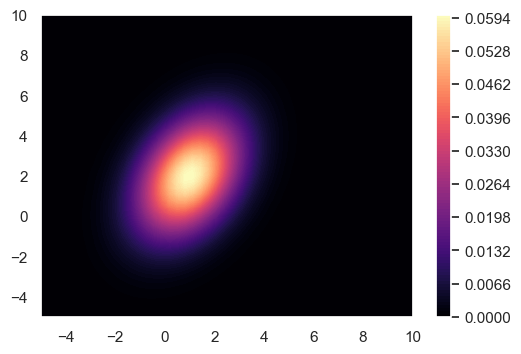

In [2]:
from scipy.linalg import cho_factor, cho_solve
d =2
mean = np.array([1, 2])[:, None]
cov = np.array([[2, 1], [1, 4]])
L = cho_factor(cov, lower=True)
diagL = np.diag(L[0])
detcov = np.prod(diagL) ** 2  #Sigma = LL^T ; Determinant of prod =  prod. of determinant.
Z = 1./np.sqrt(((2*np.pi)**2)*detcov)  #normalizing constant 

#define a grid over x 
x1 = np.linspace(-5, 10, 50)
X1, X2 = np.meshgrid(x1, x1)
Xgrid = np.hstack([X1.flatten()[:, None], X2.flatten()[:, None]])[:, :, None]
Pdfs = np.array([Z*np.exp(-0.5*np.dot((xp-mean).T, cho_solve(L, xp-mean))) for xp in Xgrid])  ## See note below

## For those new to Python, the above line uses the concept of list comprehensions in Python. 
## See here: http://www.secnetix.de/olli/Python/list_comprehensions.hawk
## This is extremely useful for looping over simple expressions. 
## See also the map function: http://book.pythontips.com/en/latest/map_filter.html

#visualize the density
fig, ax = plt.subplots(dpi=100)
plt.contourf(X1, X2, Pdfs.reshape((50, 50)), 100, cmap = 'magma')
plt.colorbar();

Define a function ```mvnpdf``` which accepts an input $\mathbf{x}$ of any arbitrary dimension, $d$, and also accepts a mean vector and covariance matrix and returns the density of the normal distribution with given mean and covariance at point $\mathbf{x}$. Feel free to re-use any/all code from the example given above.

In [3]:
def mvnpdf(x,mean,cov):
    """
    Returns the density of the normal distribution with given mean and covariance at point x

    Inputs:
    x: data vector of dimension d
    mean: mean vector
    cov: covariance matrix
    Outputs:
    Pd: Probability density
    Requirement:
    - Covariance matrix must be positive definite 
    """
    d = x.shape[0]
    L = cho_factor(cov, lower=True) # Cholesky decomposition
    diagL = np.diag(L[0]) # Diagonal element of L
    detcov = np.prod(diagL) ** 2  # Sigma = LL^T ; Determinant of prod =  prod. of determinants
    Z = 1./np.sqrt(((2*np.pi)**2)*detcov)  # normalizing constant 

    # Probability Density 
    Pd = Z*np.exp(-0.5*np.dot((x-mean).T, cho_solve(L, x-mean)))
    return Pd


**Note: You can assume that the density is non-degenerate, i.e., the covariance matrix is positive definite.**

Let's test your implementation. Use ```numpy.random.randn``` and ```sklearn.datasets.make_spd_matrix```  to generate random mean vector and covariance matrix, $\mu$ and $\Sigma$ for a random variable in $2$ dimensions. Visualize the contours of the density function. Use ```scipy.stats.multivariate_normal``` to verify that you get the correct result. 

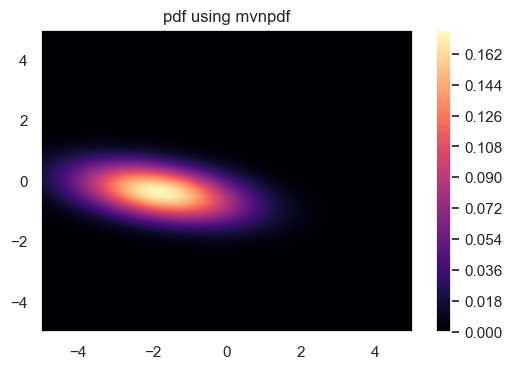

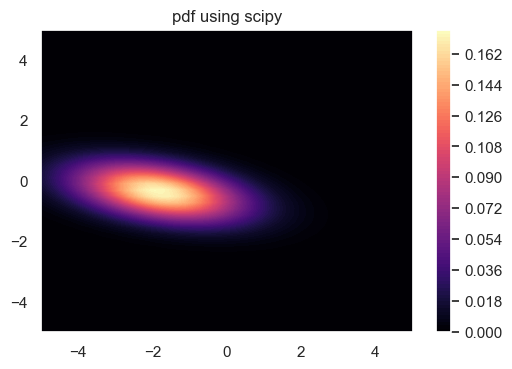

In [4]:
d = 2 # dimension
mean_mv = np.random.randn(d,1) # samples from the “standard normal” distribution
cov_mv = make_spd_matrix(d) # random symmetric, positive-definite matrix

# Define a grid over x 
x1_s = np.linspace(-5, 5, 50)
X1_s, X2_s = np.meshgrid(x1_s, x1_s)
Xgrid_s = np.hstack([X1_s.flatten()[:, None], X2_s.flatten()[:, None]])[:, :, None]

# pdf using above written function
Pdf_mvnpdf = np.array([mvnpdf(xp,mean_mv,cov_mv) for xp in Xgrid_s])
# pdf using Scipy inbuilt function 
rv = st.multivariate_normal(mean=mean_mv.flatten(),cov=cov_mv)
Pdf_scipy = np.array([rv.pdf(xp.T) for xp in Xgrid_s])

# Comparison by visualization
fig, ax = plt.subplots(dpi=100)
plt.contourf(X1_s, X2_s, Pdf_mvnpdf.reshape((50, 50)), 100, cmap = 'magma')
plt.colorbar()
plt.title('pdf using mvnpdf')

fig, ax = plt.subplots(dpi=100)
plt.contourf(X1_s, X2_s, Pdf_scipy.reshape((50, 50)), 100, cmap = 'magma')
plt.colorbar()
plt.title('pdf using scipy');

As can be seen from the above two plots that the contour of 2-d multivariable normal distribution based on written function and one from scipy are same, so, our written funciton gives correct result.

## Sampling from a multivariate Gaussian

Recall that a univariate random variable, $\mathbf{q} \sim \mathcal{N}({\mathbf{q}|\mu, \sigma^2})$, can be expressed as $\mathbf{q} = \mu + \sigma \mathbf{z}$, where, $\mathbf{z} \sim \mathcal{N}({\mathbf{z}|0, 1})$ is a standard normal random variable. This suggests an easy approach for sampling from a univariate distribution with arbitrary mean and variance - Sample from the standard normal distribution $\mathcal{N}(0, 1)$, scale the result by standard deviation $\sigma$ and then translate by $\mu$.

The approach to sampling from a multivariate Gaussian is analogous to the univariate case. Here are the steps:
1. Compute  the Cholesky decomposition of the covariance matrix $\Sigma$ i.e. find $\mathbf{L}$ such that $\Sigma = \mathbf{L} \mathbf{L}^T$.
2. Sample a vector $\mathbf{z}$ from the multivariate standard normal in the given dimensions, i.e., $\mathcal{N}(\mathbf{0}_{d}, ,\mathbf{I}_{d\times d})$.
3. Scale and shift: $\mathbf{x} = \mu + \mathbf{L}\mathbf{z}$.

The code below samples from the MVN defined in the previous section of this question.

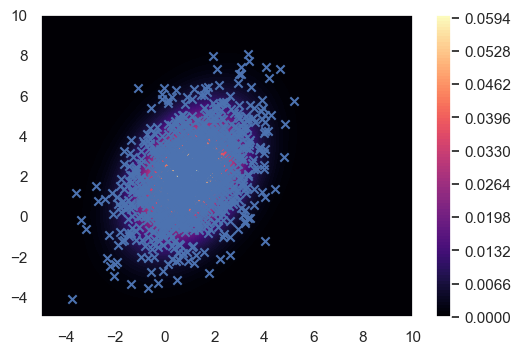

In [5]:
nsamples = 1000
samples = np.array([mean + np.dot(np.tril(L[0]), np.random.randn(2, 1)) for i in range(nsamples)])[:, :, 0]
x1 = samples[:,0]
x2 = samples[:,1]

# plot samples and compare to the pdf
fig, ax = plt.subplots(dpi=100)
plt.contourf(X1, X2, Pdfs.reshape((50, 50)), 100, cmap = 'magma')
plt.colorbar()
plt.scatter(x1, x2, marker='x');

Note that the generated samples look like they have been drawn from the MVN defined earlier. 

Define a function ```mvnsamples``` which accepts as input the mean vector and covariance matrix of a multivariate distribution of any arbitrary dimension, $d$, and returns $n$ samples from the distribution. $n$ is also to be passed as a parameter to the function.

In [6]:
def mvnsamples(mean,cov,nsamples):
    """
    Returns n samples from the multivariate normal distribution of dimensiond d with given mean and covariance

    Inputs:
    mean: mean vector
    cov: covariance matrix
    nsamples: number of samples
    Outputs:
    samples: samples of distribution
    """
    d = mean.shape[0]
    L = cho_factor(cov, lower=True) # Cholesky decomposition
    samples = np.array([mean+np.dot(np.tril(L[0]), np.random.randn(d, 1)) for i in range(nsamples)])
    return samples

Let's test your implementation. For the same mean and covariance generated earlier, draw $n$ samples and visualize it with a scatter plot. Make sure to compare the scatter plot with the density contours to verify your sampler is implemented correctly. 

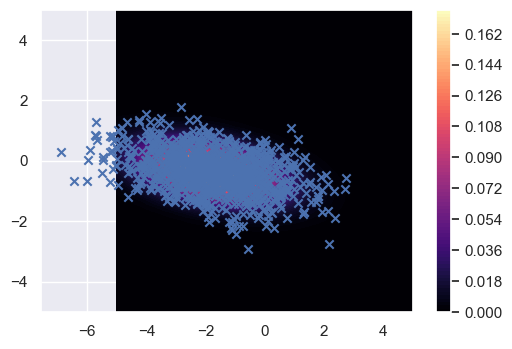

In [7]:
nsamples = 1000
samples_s = mvnsamples(mean_mv, cov_mv, nsamples)
fig, ax = plt.subplots(dpi=100)
plt.contourf(X1_s, X2_s, Pdf_scipy.reshape((50, 50)), 100, cmap = 'magma')
plt.colorbar()
x_s = samples_s[:,0]
y_s = samples_s[:,1]
plt.scatter(x_s, y_s, marker='x');

# Problem 4 - Linear regression on noisy dataset

Consider the following dataset:

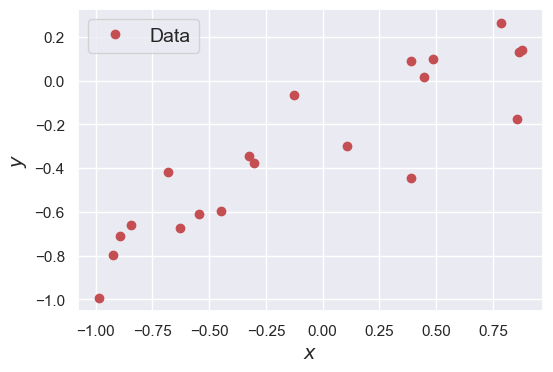

In [8]:
data =  np.loadtxt('hw3_data1.txt')
X = data[0, :]
Y = data[1, :]
plt.figure(dpi=100)
plt.plot(X, Y, 'ro', label = 'Data')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend(loc='best', fontsize = 14);

We will try to fit the following linear regression model for this dataset: 
$$
f(x;\mathbf{w}) = w_0 + w_1 x,
$$
where, $w_0$ and $w_1$ are model  parameters. 

## Part A

### Bayesian linear regression (Part 1)

Consider the additive noise model:
$$
y = f(x;\mathbf{w}) + \epsilon = w_0 + w_1 x + \epsilon,
$$
where, $\epsilon \sim \mathcal{N}(\epsilon|0, \sigma^2)$.

Consider the following isotropic prior on the weights:
$$
p(\mathbf{w}) = \mathcal{N}(\mathbf{w}|0, \alpha^{-1}\mathbf{I}).
$$

The density function of multivariate Gaussians can be found [here](https://en.wikipedia.org/wiki/Multivariate_normal_distribution). We will take a look at how to efficiently compute the density of multivariate Gaussians later in the course but for the time being let's use [scipy's implementation](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.multivariate_normal.html) of the same to visualize the prior. 

Generate a grid of $w_0$ and $w_1$ values and use scipy's ```multivariate_normal.pdf``` method to compute the prior probability density at each location of the grid. Note that the prior mean and covariance are shown in the expression above. Show the contour plot of the prior pdf. If you aren't already familiar, check out [this tutorial](https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html) on matplotlib contour plots.


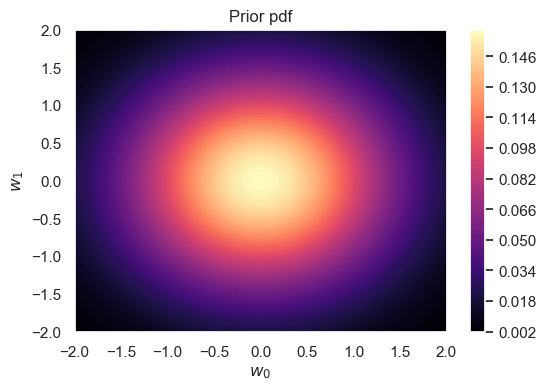

In [9]:
# Prior Parameters
alpha = 1. # Assuming an initial value of parameters precision in prior
mean = np.zeros(2) # mean of model parameters in prior
cov = (1./alpha)*np.eye(2) # covariance of model parameters in prior

# Grid
w = np.linspace(-2, 2, 50)
w0, w1 = np.meshgrid(w,w)
wgrid = np.hstack([w0.flatten()[:, None], w1.flatten()[:, None]])[:, :, None]

# multivariate normal pdf
rv = st.multivariate_normal(mean = mean.flatten(), cov = cov)
Pdfs = np.array([rv.pdf(wp.T) for wp in wgrid])

# Prior Contour Plot 
fig, ax = plt.subplots(dpi=100)
plt.contourf(w0, w1, Pdfs.reshape((50, 50)), 100, cmap = 'magma')
plt.xlabel('$w_0$')
plt.ylabel('$w_1$')
plt.colorbar()
plt.title('Prior pdf');

Generate some samples of $\mathbf{w}$ from the prior and visualize the corresponding. You can use ```numpy.multivariate_normal```. An example using arbitrary mean and covariance  is shown below:

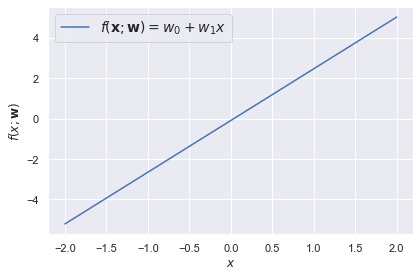

In [10]:
mean = np.array([1, 2])
cov = np.array([[2, 0], [0, 2]])
w_sample = np.random.multivariate_normal(mean = mean, cov = cov, size = 1)
w_0 = w_sample[0, 0]
w_1 = w_sample[0, 1]
x = np.linspace(-2, 2, 100)

plt.plot(x, w_0 + w_1*x, label='$f(\mathbf{x};\mathbf{w}) = w_0 + w_1 x$')
plt.xlabel('$x$')
plt.ylabel('$f(x;\mathbf{w})$')

plt.legend(loc='best', fontsize=14)
plt.tight_layout()

**Note**: Please make sure all samples of $f$ are shown in the same plot. 

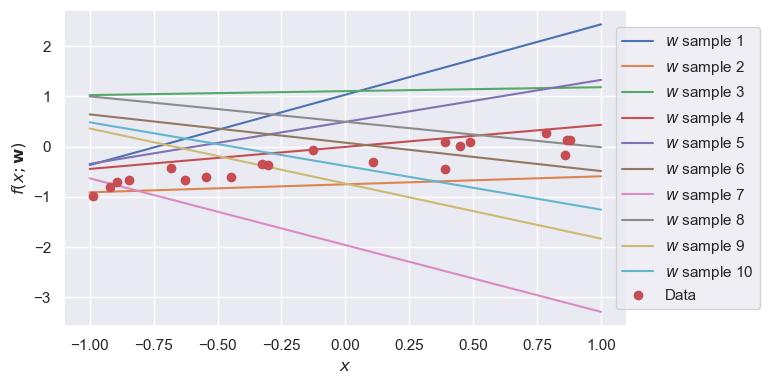

In [11]:
# Prior Parameters
alpha = 1. # Assuming an initial value of parameters precision in prior
mean = np.zeros(2) # mean of model parameters in prior
cov = (1./alpha)*np.eye(2) # covariance of model parameters in prior

nsamples = 10 # number of samples
w_samples = np.random.multivariate_normal(mean = mean, cov = cov, size = nsamples)

fig, ax = plt.subplots(figsize=(8,4),dpi=100)
x = np.linspace(-1, 1, 100)
for i in range(nsamples):
    w_0 = w_samples[i, 0]
    w_1 = w_samples[i, 1]
    plt.plot(x, w_0 + w_1*x, label=f'$w$ sample {i+1}')
data =  np.loadtxt('hw3_data1.txt')
X = data[0, :]
Y = data[1, :]
plt.plot(X, Y, 'ro', label = 'Data')
plt.xlabel('$x$')
plt.ylabel('$f(x;\mathbf{w})$')
plt.legend(loc='center right', bbox_to_anchor=(1.25,0.5))
plt.tight_layout()

Define a function that accepts the prior precision $\alpha$ and the noise variance $\sigma^2$ and returns the posterior mean and covariance of $w$. 

In [12]:
# Function and Class to calculate design matrix
class LinearBasis(object):
    """
    Represents a 1D linear basis.
    """
    def __init__(self):
        self.num_basis = 2 # The number of basis functions
    def __call__(self, x):
        """
        ``x`` should be a 1D array.
        """
        return [1., x[0]]

def compute_design_matrix(X, phi):
    """
    Arguments:
    
    X   -  The observed inputs (1D array)
    phi -  The basis functions.
    """
    num_observations = X.shape[0]
    num_basis = phi.num_basis
    Phi = np.ndarray((num_observations, num_basis))
    for i in range(num_observations):
        Phi[i, :] = phi(X[i, :])
    return Phi

# Function to calculate posterior mean and covariance
def postmeanvar(alpha, sigma2):
    """
    Calculates posterior mean and covariance of w

    Inputs:
    alpha: prior precision
    sigma2: noise variance
    Outputs:
    n: posterior mean of w
    S: posterior covariance of w
    """
    sigma = np.sqrt(sigma2)
    A = np.dot(Phi.T, Phi) / sigma ** 2. + alpha * np.eye(Phi.shape[1])
    L = scipy.linalg.cho_factor(A) # Cholesky decomposition
    m = scipy.linalg.cho_solve(L, np.dot(Phi.T, Y) / sigma ** 2)  # The posterior mean of w
    S = scipy.linalg.cho_solve(L, np.eye(Phi.shape[1]))           # The posterior covariance of w
    return m, S


Visualize the posterior distribution over $w$ using scipy's ```multivariate_normal.pdf``` function. 

Posterior Mean:  [-0.28218999  0.48115034]
Posterior Covariance:
[[0.01002891 0.00172224]
 [0.00172224 0.02318671]]


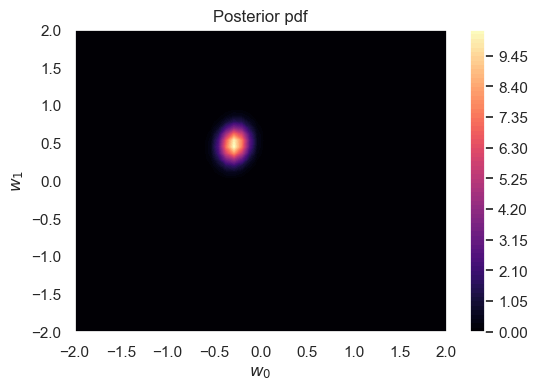

In [13]:
# Visualize the posterior
# Prior distribution and data assumptions
alpha = 1.
sigma2 = 0.2
data =  np.loadtxt('hw3_data1.txt')
phi = LinearBasis()
X = data[0, :][:,None]
Y = data[1, :]
Phi = compute_design_matrix(X, phi) # design matrix

# posterior mean and covariance
post_m, post_cov = postmeanvar(alpha, sigma2)
print('Posterior Mean: ', post_m)
print('Posterior Covariance:')
print(post_cov)

# Grid
w = np.linspace(-2, 2, 50)
w0, w1 = np.meshgrid(w,w)
wgrid = np.hstack([w0.flatten()[:, None], w1.flatten()[:, None]])[:, :, None]

# multivariate normal pdf
rv = st.multivariate_normal(mean = post_m.flatten(), cov = post_cov)
post_Pdfs = np.array([rv.pdf(wp.T) for wp in wgrid])

# Contout Plot 
fig, ax = plt.subplots(dpi=100)
plt.contourf(w0, w1, post_Pdfs.reshape((50, 50)), 100, cmap = 'magma')
plt.xlabel('$w_0$')
plt.ylabel('$w_1$')
plt.colorbar()
plt.title('Posterior pdf');

**How is the posterior different from the prior?**

As we can see from posterior and prior pdf plots that the posterior pdf is more concentrated around mean compared to prior, so the weights $\mathbf{w}$ covariance in the posterior is significantly lower than prior which can also be verified from the values shown above. Also the the weights $\mathbf{w}$ mean value in posterior of $[-0.28 \ \ 0.48]^T$ is slightly different than prior mean value of $[0 \ \ 0]^T$. So by using the observed data with prior, the weights $\mathbf{w}$ expected value (mean) changes slightly and also the uncertainty in the parameters value decreases.

Plot some samples from the posterior distribution:

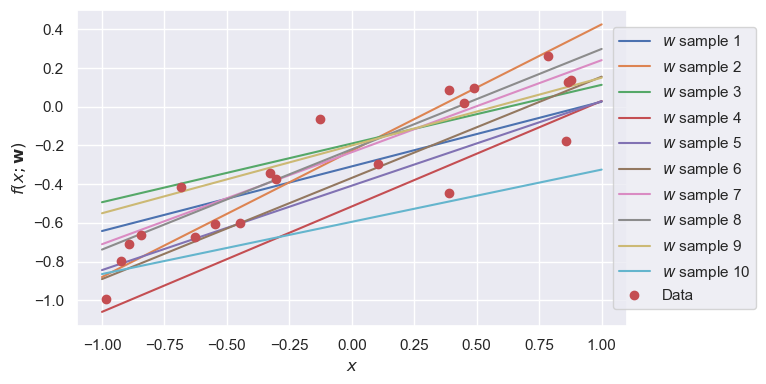

In [14]:
# Code to plot some samples from posterior 
nsamples = 10
w_samples = np.random.multivariate_normal(mean = post_m, cov = post_cov, size = nsamples)

fig, ax = plt.subplots(figsize=(8,4),dpi=100)
x = np.linspace(-1, 1, 100)
for i in range(nsamples):
    w_0 = w_samples[i, 0]
    w_1 = w_samples[i, 1]
    plt.plot(x, w_0 + w_1*x, label=f'$w$ sample {i+1}')
data =  np.loadtxt('hw3_data1.txt')
X = data[0, :]
Y = data[1, :]
plt.plot(X, Y, 'ro', label = 'Data')
plt.xlabel('$x$')
plt.ylabel('$f(x;\mathbf{w})$')
plt.legend(loc='center right', bbox_to_anchor=(1.25,0.5))
plt.tight_layout()

Visualize the mean and variance of the posterior predictive distribution. Make sure to distinguish between 
measurement noise and epistemic uncertainty.

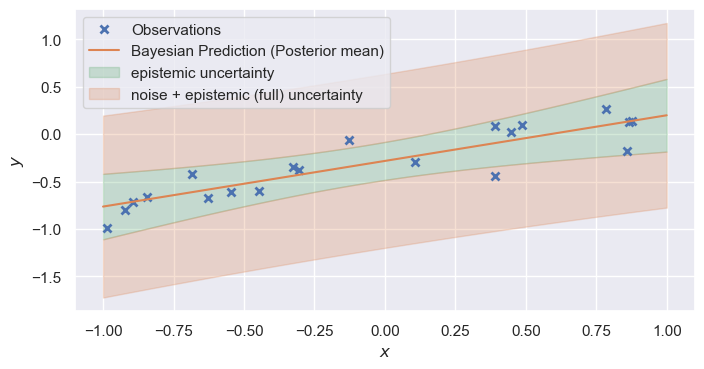

In [15]:
# Visualize posterior predictive distribution.
X_p = np.linspace(np.floor(X.min()),np.ceil(X.max()), 100)[:, None]
Phi_p = compute_design_matrix(X_p, phi)
Y_p = np.dot(Phi_p, post_m) # The mean prediction
V_p_ep = np.einsum('ij,jk,ik->i', Phi_p, post_cov, Phi_p) # The epistemic uncertainty
S_p_ep = np.sqrt(V_p_ep)
V_p = V_p_ep + sigma2 # Full uncertainty
S_p = np.sqrt(V_p)
Y_l_ep = Y_p - 2. * S_p_ep  # Lower epistemic predictive bound
Y_u_ep = Y_p + 2. * S_p_ep  # Upper epistemic predictive bound
Y_l = Y_p - 2. * S_p # Lower predictive bound
Y_u = Y_p + 2. * S_p # Upper predictive bound

# Plot
fig, ax = plt.subplots(figsize=(8,4),dpi=100)
ax.plot(X, Y, 'x', markeredgewidth=2, label='Observations')
ax.plot(X_p, Y_p, label='Bayesian Prediction (Posterior mean)')
ax.fill_between(X_p.flatten(), Y_l_ep, Y_u_ep, color=sns.color_palette()[2], alpha=0.25,  label = 'epistemic uncertainty')
ax.fill_between(X_p.flatten(), Y_l, Y_l_ep, color=sns.color_palette()[1], alpha=0.25, label = 'noise + epistemic (full) uncertainty')
ax.fill_between(X_p.flatten(), Y_u_ep, Y_u, color=sns.color_palette()[1], alpha=0.25)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='upper left');

It is a good idea to set aside a part of your dataset for the purpose of testing the accuracy of your trained model. 
Consider the following test dataset:

In [16]:
testdata = np.loadtxt('hw3_data1_test.txt')
Xtest = testdata[0, :]
Ytest = testdata[1, :]

Make predictions on the test inputs, ```Xtest```, using the posterior predictive distribution under the Bayesian model. Compare it to the least squares predictions. Recall that the  least squares estimate of $\mathbf{w}$ is given by:
$$
\mathbf{w}_{\mathrm{LS}} = (\mathbf{\Phi}^T \mathbf{\Phi})^{-1} \mathbf{\Phi}^T y_{1:N}. 
$$
Use ```numpy.lstsq``` to obtain $\mathbf{w}_{\mathrm{LS}}$. The prediction at a new test location $x^*$ is given by $y^* = \mathbf{w}_{\mathrm{LS}, 0} + \mathbf{w}_{\mathrm{LS}, 1}x^*$.

In [17]:
Phi_test = compute_design_matrix(Xtest[:,None], phi)
#  Least Square Prediction
w_LS = np.linalg.lstsq(Phi, Y, rcond=None)[0] # least square parameter estimation
Ypred_ls = np.dot(Phi_test, w_LS) # y prediction with ls

# Bayesian Model Prediction
Ypred_bayes = np.dot(Phi_test, post_m) # The mean prediction
V_p_ep = np.einsum('ij,jk,ik->i', Phi_test, post_cov, Phi_test) # The epistemic uncertainty
S_p_ep = np.sqrt(V_p_ep)
V_p = V_p_ep + sigma2 # Full uncertainty
S_p = np.sqrt(V_p)
Y_l_ep = Ypred_bayes - 2. * S_p_ep  # Lower epistemic predictive bound
Y_u_ep = Ypred_bayes + 2. * S_p_ep  # Upper epistemic predictive bound
Y_l = Ypred_bayes - 2. * S_p # Lower predictive bound
Y_u = Ypred_bayes + 2. * S_p # Upper predictive bound

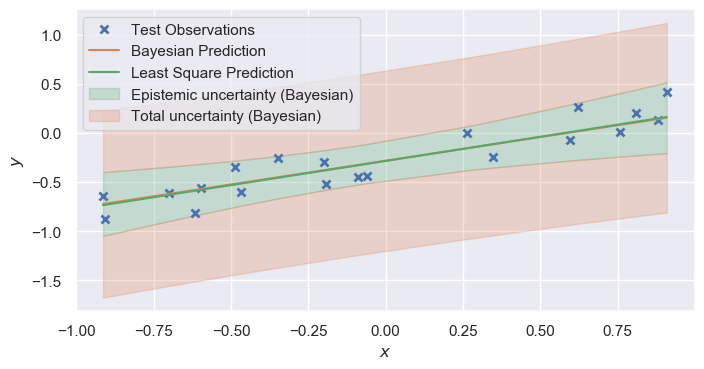

In [18]:
# Plottting thr predictions
fig, ax = plt.subplots(figsize=(8,4),dpi=100)
ax.plot(Xtest, Ytest, 'x', markeredgewidth=2, label='Test Observations')
ax.plot(np.sort(Xtest), np.sort(Ypred_bayes), label='Bayesian Prediction')
X_p = np.sort(Xtest)
ax.fill_between(X_p.flatten(), np.sort(Y_l_ep), np.sort(Y_u_ep), color=sns.color_palette()[2], alpha=0.25, label = 'Epistemic uncertainty (Bayesian)')
ax.fill_between(X_p.flatten(), np.sort(Y_l), np.sort(Y_l_ep), color=sns.color_palette()[1], alpha=0.25, label = 'Total uncertainty (Bayesian)')
ax.fill_between(X_p.flatten(), np.sort(Y_u_ep), np.sort(Y_u), color=sns.color_palette()[1], alpha=0.25)
ax.plot(np.sort(Xtest), np.sort(Ypred_ls), label='Least Square Prediction')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='upper left');

The above plot shows the prediction based on the parameters from least squares method as well as from Bayesian predictive distribution with the test observation data. The epistemic as well as the total uncertainty in the Bayesian prediction is also shown. <br>
To compare the predictions based on these two different approaches we can also make the observations with predictions scatter plot and then check the spread around $y=x$ line to decide the quality of prediction which is done below.

Least square prediction R2 : 0.8443666079951976
Bayesian prediction R2 : 0.8408567086238597


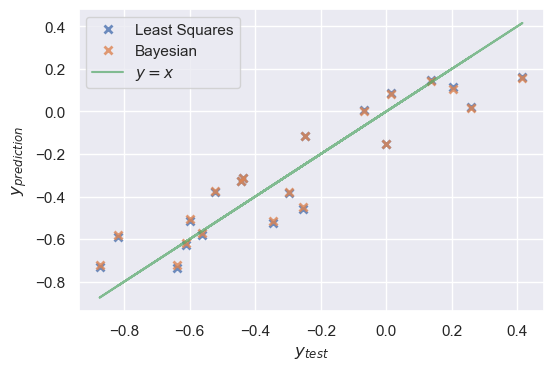

In [19]:
# Plot observations vs predictions
fig, ax = plt.subplots(dpi=100)
X_p = np.sort(Xtest)
ax.plot(Ytest, Ypred_ls, 'x', alpha=0.8, markeredgewidth=2, label='Least Squares')
ax.plot(Ytest, Ypred_bayes, 'x', alpha=0.8, markeredgewidth=2, label='Bayesian')
ax.plot(Ytest, Ytest, alpha=0.7, label='$y=x$')
ax.set_xlabel('$y_{test}$')
ax.set_ylabel('$y_{prediction}$')
plt.legend(loc='best')

# Calculate predictions R2 values
from sklearn.metrics import r2_score
r2_ls = r2_score(Ytest,Ypred_ls)
r2_bayes = r2_score(Ytest,Ypred_bayes)
print(f'Least square prediction R2 : {r2_ls}')
print(f'Bayesian prediction R2 : {r2_bayes}')

**Which model (Bayesian or least squares) offers better predictions? Why do you think that is?**

Both the models predicts with very similar accuracy because as we can see from both the above plots that the predictions points based on both models overlaps with slight differences, and also the prediction $R^2$ values are very similar for both. However, one additional benefit of Bayesian model predictions is that it provides both the epistemic uncertainty and total uncertainty in predictions which might be useful based on the application of results.  

**In what situations (if any) would you expect simple least squares regression to perform better than the Bayesian regression?**

It depend on the application, purpose and the requirements of the modeling regression and its predictions results. Simple least squares regression just gives predicted values; whereas, with Bayesian regression, along with the predicted values one can also get the epistemic and total (epistemic + noise) uncertainty in the prediction. However, Bayesian regression requires more effort in the problem setup and more computational power in estimating the predictions with uncertainty compared to least squares regression. So, if the user is only interested in the mean predictions values and not in the prediction uncertainties, using simple linear regression make sense. In addition, Bayesian regression needs the user to define the prior on model parameters and hyper-parameters which may not be possible for some problem, then in that case the least squares regression implementation might make sense. In other cases, when there is a large set of observation data is available than the number of model parameters needs to be estimated, and the user knows that there is insignificant or small noise in the data which the user might know depending on the data source, then using the least squares regression might be good enough because the Bayesian regression will give similar results as there will be small epistemic uncertainty due to large data set and also small total uncertainty due to negligible noise in the data. 

## Part B

### Evidence approximation

Picking the hyperparameters $\alpha$ and $\sigma^2$ is tricky. In theory, the fully approach to modeling the uncertainty in the hyperparameters is  simple - put  priors on them and make predictions on test data by marginalizing wrt to the hyperparameters and model weights. In practice, the resulting integrals are intractable. A popular and easy to implement approach to hyperparameter selection is [cross validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)). The idea is to choose a set of hyperparameter values, train the model at each value in the set and test it predictive accuracy. Finally, you select the values of the hyperparameters that offer the best predictive capacity.

A more systematic approach is to maximize the model evidence. The evidence is the marginal likelihood  of the data conditional on the hyperparameters, i.e., $p(y|x, \alpha, \sigma^2)$. 
Under the Gaussian likelihood and isotropic Gaussian prior model, the log evidence is given by:
$$
log p(y|x, \alpha, \beta) = \frac{M}{2} \log \alpha + \frac{N}{2} \log \beta - E(\mathbf{m}) -\frac{1}{2} \log \mathrm{det}(A) - \frac{N}{2} \log 2\pi,
$$
where, 
$\beta$ is the inverse noise variance (or precision), 

$$A = \alpha \mathbf{I} + \beta \Phi^T \Phi,$$ $$\mathbf{m} = \beta A^{-1} \Phi^T y_{1:N},$$

and $M$ is the number of model parameters, which in this case is 2. 

The term $E(\mathbf{m})$ is a regularized misfit term given by:
$$
E(\mathbf{m}) = \frac{\beta}{2} \| y_{1:N} - \Phi \mathbf{m} \|_{2}^{2} + \frac{\alpha}{2} \| \mathbf{m} \|_{2}^{2}.
$$

Set up a function ```evidence``` that accepts the prior precision, $\alpha$ and the inverse noise variance, $\beta$, and returns the value of the evidence function. Feel free to parameterize your implementation of the ```evidence``` in whatever way you see fit.

In [20]:
def evidence(alpha, beta):
    """
    Calculate the evidence function

    Inputs:
    alpha: Prior Precision
    beta: inverse noise variance
    Outputs:
    evidence: evidence function value
    """
    N = Phi.shape[0] # Number of observations
    M = Phi.shape[1] # Number of model parameters
    A = alpha*np.eye(M) + beta*np.dot(Phi.T, Phi) # A matrix
    L = scipy.linalg.cho_factor(A) # Cholesky decomposition
    m = scipy.linalg.cho_solve(L, beta*np.dot(Phi.T, Y))
    Em = (beta/2.)* (np.linalg.norm(Y-np.dot(Phi, m)))**2 + (alpha/2.)*(np.linalg.norm(m))**2
    diagL = np.diag(L[0]) # Diagonal element of L
    detA = np.prod(diagL) ** 2  # Sigma = LL^T ; Determinant of prod =  prod. of determinants
    log_evidence = (M/2.)*np.log(alpha) + (N/2.)*np.log(beta) - Em - (1./2)*np.log(detA) - (N/2.)*np.log(2*np.pi)
    evidence = np.exp(log_evidence)
    return evidence

Use a suitable second order unconstrained optimization routine from ```scipy.optimize``` to minimize the **negative log evidence**. A popular method is the [BFGS algorithm.](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-bfgs.html). Be sure to read the documentation carefully.

In [21]:
# Set up the optimization routine and minimize the negative log evidence. 
from scipy.optimize import minimize

# Optimization function (the negative log evidence)
def fun(x):
    return -np.log(evidence(x[0],x[1]))

# Optmization using "BFGS" algorithm
optima =  minimize(fun, x0 = (1, 5), method='BFGS')

# Optimization Results
print(optima.message)
x_opt = optima.x
fun_opt = optima.fun
alpha_opt = x_opt[0]
beta_opt =  x_opt[1]
sigma2_opt = 1./beta_opt
print('Optimum alpha: ', alpha_opt)
print('Optimum beta: ', beta_opt)
print('Optimum sigma2: ', sigma2_opt)

Optimization terminated successfully.
Optimum alpha:  6.310033907186991
Optimum beta:  34.64195255736216
Optimum sigma2:  0.02886673314225409


Use the estimates of the hyperparameters obtained by maximizing the evidence to recompute the posterior mean and variance of the model parameters under the constant prior precision and likelihood variance model. 

In [22]:
# posterior mean and variance. 
post_m_evd, post_cov_evd = postmeanvar(alpha_opt, sigma2_opt)
print('Posterior Mean (with evidence approx): ', post_m_evd)
print('Posterior Covariance (with evidence approx):')
print(post_cov_evd)

# Difference with eastlier estimation
delta_m = post_m_evd - post_m
delta_cov = post_cov_evd - post_cov
print('Posterior mean and covariance difference with earlier estimation:')
print('Delta mean: ',delta_m)
print('Delta Covariance:')
print(delta_cov)

Posterior Mean (with evidence approx):  [-0.28236863  0.48210461]
Posterior Covariance (with evidence approx):
[[0.00144884 0.00024932]
 [0.00024932 0.0033536 ]]
Posterior mean and covariance difference with earlier estimation:
Delta mean:  [-0.00017864  0.00095427]
Delta Covariance:
[[-0.00858007 -0.00147292]
 [-0.00147292 -0.01983311]]


**Does this differ from your earlier estimate of the posterior mean and variance?**

As can be seen from the above outputs that there is a small difference in the posterior mean and covariance with the case of user defined hyper-parameters and hyper-parameters derived from evidence approximation. As we can see from the negative $\Delta$ values above that the posterior covariance is smaller with the case of hyper-parameters derived using evidence approximation, it means that the spread of posterior is small in this compared to the earlier case which we will also see from the plots below.   

**Visualize the following:** 
1.  The posterior density of $\mathbf{w}$.
2.  A few models sampled from the posterior. 
3.  The posterior predictive distribution  with noise variance and epistemic uncertainty.

1. The posterior density of $\mathbf{w}$

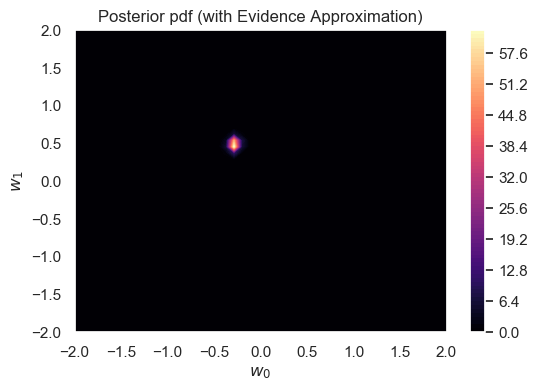

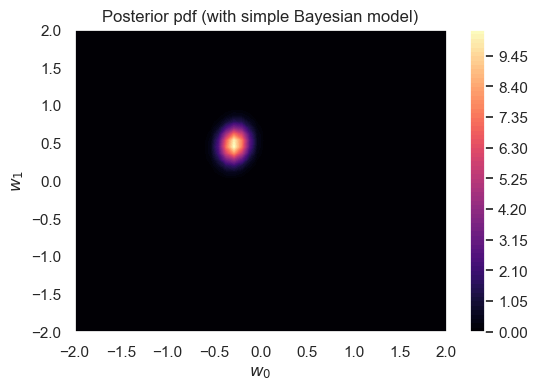

In [23]:
# Visualizations.
# 1. Posterior density
# Grid
w = np.linspace(-2, 2, 50)
w0, w1 = np.meshgrid(w,w)
wgrid = np.hstack([w0.flatten()[:, None], w1.flatten()[:, None]])[:, :, None]

# multivariate normal pdf
rv = st.multivariate_normal(mean = post_m_evd.flatten(), cov = post_cov_evd)
post_Pdfs_evd = np.array([rv.pdf(wp.T) for wp in wgrid])

# Contout Plot 
fig, ax = plt.subplots(dpi=100)
plt.contourf(w0, w1, post_Pdfs_evd.reshape((50, 50)), 100, cmap = 'magma')
plt.xlabel('$w_0$')
plt.ylabel('$w_1$')
plt.colorbar()
plt.title('Posterior pdf (with Evidence Approximation)');

# Contout Plot of earlier posterior estimation (for comparison)
fig, ax = plt.subplots(dpi=100)
plt.contourf(w0, w1, post_Pdfs.reshape((50, 50)), 100, cmap = 'magma')
plt.xlabel('$w_0$')
plt.ylabel('$w_1$')
plt.colorbar()
plt.title('Posterior pdf (with simple Bayesian model)');

2.  A few models sampled from the posterior

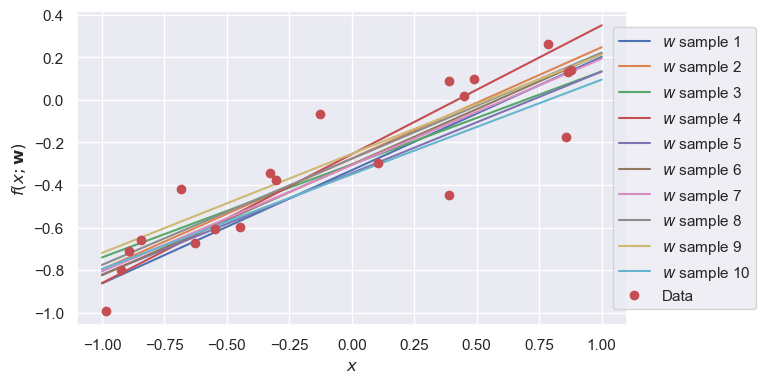

In [24]:
# 2. Some samples from posterior 
nsamples = 10
w_samples = np.random.multivariate_normal(mean = post_m_evd, cov = post_cov_evd, size = nsamples)

fig, ax = plt.subplots(figsize=(8,4),dpi=100)
x = np.linspace(-1, 1, 100)
for i in range(nsamples):
    w_0 = w_samples[i, 0]
    w_1 = w_samples[i, 1]
    plt.plot(x, w_0 + w_1*x, label=f'$w$ sample {i+1}')
data =  np.loadtxt('hw3_data1.txt')
X = data[0, :]
Y = data[1, :]
plt.plot(X, Y, 'ro', label = 'Data')
plt.xlabel('$x$')
plt.ylabel('$f(x;\mathbf{w})$')
plt.legend(loc='center right', bbox_to_anchor=(1.25,0.5))
plt.tight_layout()

3.  The posterior predictive distribution with noise variance and epistemic uncertainty

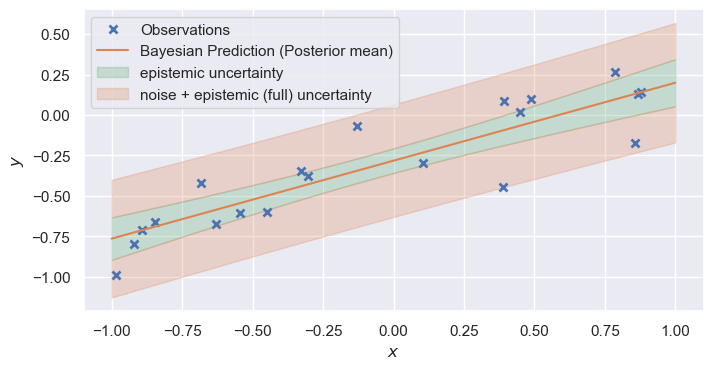

In [25]:
# 3. Posterior predictive distribution.
X_p = np.linspace(np.floor(X.min()),np.ceil(X.max()), 100)[:, None]
Phi_p = compute_design_matrix(X_p, phi)
Y_p = np.dot(Phi_p, post_m_evd) # The mean prediction
V_p_ep = np.einsum('ij,jk,ik->i', Phi_p, post_cov_evd, Phi_p) # The epistemic uncertainty
S_p_ep = np.sqrt(V_p_ep)
V_p = V_p_ep + sigma2_opt # Full uncertainty
S_p = np.sqrt(V_p)
Y_l_ep = Y_p - 2. * S_p_ep  # Lower epistemic predictive bound
Y_u_ep = Y_p + 2. * S_p_ep  # Upper epistemic predictive bound
Y_l = Y_p - 2. * S_p # Lower predictive bound
Y_u = Y_p + 2. * S_p # Upper predictive bound

# Plot
fig, ax = plt.subplots(figsize=(8,4),dpi=100)
ax.plot(X, Y, 'x', markeredgewidth=2, label='Observations')
ax.plot(X_p, Y_p, label='Bayesian Prediction (Posterior mean)')
ax.fill_between(X_p.flatten(), Y_l_ep, Y_u_ep, color=sns.color_palette()[2], alpha=0.25,  label = 'epistemic uncertainty')
ax.fill_between(X_p.flatten(), Y_l, Y_l_ep, color=sns.color_palette()[1], alpha=0.25, label = 'noise + epistemic (full) uncertainty')
ax.fill_between(X_p.flatten(), Y_u_ep, Y_u, color=sns.color_palette()[1], alpha=0.25)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='upper left');

Finally, use the model you just trained to make predictions on the  test data:

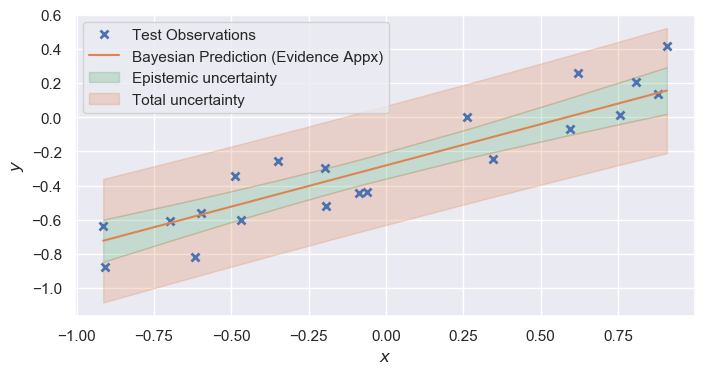

In [26]:
# Bayesian Model Prediction
Ypred_ev = np.dot(Phi_test, post_m_evd) # The mean prediction
V_p_ep = np.einsum('ij,jk,ik->i', Phi_test, post_cov_evd, Phi_test) # The epistemic uncertainty
S_p_ep = np.sqrt(V_p_ep)
V_p = V_p_ep + sigma2_opt # Full uncertainty
S_p = np.sqrt(V_p)
Y_l_ep = Ypred_ev - 2. * S_p_ep  # Lower epistemic predictive bound
Y_u_ep = Ypred_ev + 2. * S_p_ep  # Upper epistemic predictive bound
Y_l = Ypred_ev - 2. * S_p # Lower predictive bound
Y_u = Ypred_ev + 2. * S_p # Upper predictive bound

# Plottting thr predictions
fig, ax = plt.subplots(figsize=(8,4),dpi=100)
ax.plot(Xtest, Ytest, 'x', markeredgewidth=2, label='Test Observations')
ax.plot(np.sort(Xtest), np.sort(Ypred_ev), label='Bayesian Prediction (Evidence Appx)')
X_p = np.sort(Xtest)
ax.fill_between(X_p.flatten(), np.sort(Y_l_ep), np.sort(Y_u_ep), color=sns.color_palette()[2], alpha=0.25, label = 'Epistemic uncertainty')
ax.fill_between(X_p.flatten(), np.sort(Y_l), np.sort(Y_l_ep), color=sns.color_palette()[1], alpha=0.25, label = 'Total uncertainty')
ax.fill_between(X_p.flatten(), np.sort(Y_u_ep), np.sort(Y_u), color=sns.color_palette()[1], alpha=0.25)
# ax.plot(np.sort(Xtest), np.sort(Ypred_ls), label='Least Square Prediction')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='upper left');

Bayesian prediction (with Evidence Appx) R2 : 0.8411931243855035
Bayesian prediction (with simple model) R2 : 0.8408567086238597


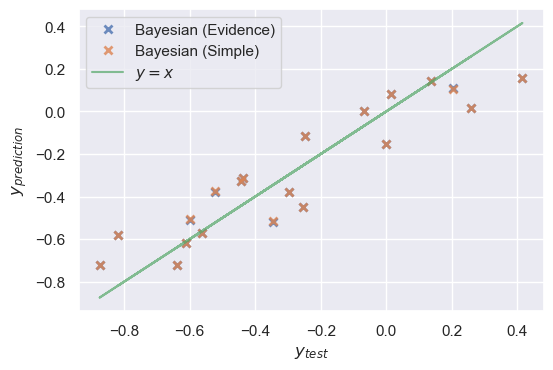

In [27]:
# Plot observations vs predictions
fig, ax = plt.subplots(dpi=100)
X_p = np.sort(Xtest)
ax.plot(Ytest, Ypred_ev, 'x', alpha=0.8, markeredgewidth=2, label='Bayesian (Evidence)')
ax.plot(Ytest, Ypred_bayes, 'x', alpha=0.8, markeredgewidth=2, label='Bayesian (Simple)')
ax.plot(Ytest, Ytest, alpha=0.7, label='$y=x$')
ax.set_xlabel('$y_{test}$')
ax.set_ylabel('$y_{prediction}$')
plt.legend(loc='best')

# Calculate predictions R2 values
from sklearn.metrics import r2_score
r2_ls = r2_score(Ytest,Ypred_ev)
r2_bayes = r2_score(Ytest,Ypred_bayes)
print(f'Bayesian prediction (with Evidence Appx) R2 : {r2_ls}')
print(f'Bayesian prediction (with simple model) R2 : {r2_bayes}')

**How do the predictions compare to the previous versions?**

As can be seen from above $R^2$ values and plot that we got very similar mean predictions results. No much difference here. However, as we can see from comparing the predictions plot with epistemic and total uncertainty above with the previous case, that with evidence approximation here the estimated uncertainties in predictions are smaller compared to the previous case of using simple Bayesian model.    

# Problem 5

### Bayesian linear regression  (Part 2)

We will now look at a somewhat more complicated example. The following dataset was generated using a molecular dynamics simulation of a plastic material (thanks to [Professor Alejandro Strachan](https://engineering.purdue.edu/MSE/people/ptProfile?id=33239) for sharing the data!).
In particular, we took a rectangular chunk of the material and we started applying tensile forces along one dimension.
What you see in the data set below is the instantaneous measurements of *strain* (percent enlogation of the material in the pulling direction) vs the normal *stress* (force per square area in MPa = $10^6 \text{N}/m^2$).
This [video](https://youtu.be/K6vOkQ5F9r0) will help you understand how the dataset was generated.

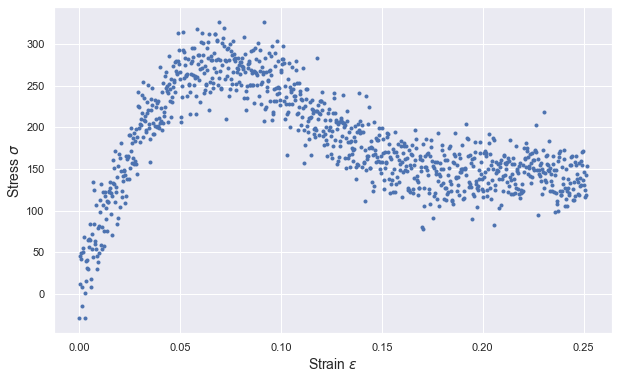

In [28]:
data = np.loadtxt('stress_strain.txt')
epsilon = data[:, 0]
sigma = data[:, 1]
fig, ax = plt.subplots(figsize = (10, 6))
ax.plot(epsilon, sigma, '.')
ax.set_xlabel('Strain $\epsilon$', fontsize = 14)
ax.set_ylabel('Stress $\sigma$', fontsize = 14);

This is a noisy dataset.
We would like to process it in order to extract what is known as the [stress-strain curve](https://en.wikipedia.org/wiki/Stress–strain_curve) of the material.
The stress-strain curve characterizes the type of the material (the chemical bonds, the crystalline structure, any defects, etc.).
It is a required input to the equations of [elasticity](https://en.wikipedia.org/wiki/Elasticity_(physics)) otherwise known as a *constitutive relation*.

### Part A
The very first part of the stress-strain curve is very close to being linear.
It is called the *elastic regime*.
In that region, say $\epsilon < \epsilon_l=0.04$, the relationship between stress and strain is:
$$
\sigma(\epsilon) = E\epsilon.
$$
The constant $E$ is known as the *Young modulus* of the material.
Use a generalized linear model and Bayesian linear regression to:
+ Compute the posterior of $E$ given the data;
+ Visualize your epistemic and aleatory uncertainty about the stress-strain curve in the elastic regime;
+ Take five plausible samples of the linear stress-strain curve and visualize them.

In your answer, you should first clearly describe your model in text using the notation of the lectures and then code the solution.

**Solution:**

The relationship between stress and strain in the elastic region:
$$
\sigma(\epsilon) = E\epsilon.
$$
So, there is only one model parameter $M=1$. To use a generalized linear model and Bayesian linear regression we have,
+ Model the data using some fixed basis as:
\begin{gather*}
y(x;w) = w\phi(x)\\
\text{where } y \equiv \sigma  \in \mathbb{R} \text{ [stress (output/label)]; }\\
x \equiv \epsilon  \in \mathbb{R} \text{ [strain (input)]; }\\
\phi(x) = x  \in \mathbb{R}\text{ [basis function]}\\
w \equiv E  \in \mathbb{R} \text{ [Young's modulus (model parameter)]; } \\
\mathbf{y}(\mathbf{x};w) = \boldsymbol{\Phi}w \\
\text{where } \mathbf{y}\in\mathbb{R}^N \text{(outputs or target variables) ;} \boldsymbol{\Phi} \in \mathbb{R}^{N \times 1} \text{(design matrix)}
\end{gather*}
+ Assuming Gaussian **Likelihood**:
\begin{gather*}
\mathbf{y}_{1:N} | \mathbf{x}_{1:N}, w, \sigma \sim p(\mathbf{y}|\mathbf{x},w,\sigma) \sim N(\mathbf{y}|\boldsymbol{\Phi}w, \sigma^2\mathbf{I})\\
\text{where } \sigma^2 \text{: (likelihood noise variance)} \end{gather*}
\begin{align*}
N(\mathbf{y}|\boldsymbol{\Phi} w, \sigma^2\mathbf{I}) &= \det(2\pi\sigma^{2}I)^{-1/2} \exp\left( -\frac{1}{2}(\mathbf{y}-\boldsymbol{\Phi}w)^T (\sigma^2\mathbf{I})^{-1} (\mathbf{y}-\boldsymbol{\Phi}w) \right) \\
&= (2\pi\sigma^2)^{-N/2} \exp\left( -\frac{1}{2\sigma^2}(\mathbf{y}-\boldsymbol{\Phi}w)^T (\mathbf{y}-\boldsymbol{\Phi}w)\right)
\end{align*}
+ Model the uncertainty in the model parameter using a Gaussian **prior**:
\begin{gather*}
w|\alpha \sim p(w|\alpha) \sim \mathcal{N}(w|0,\alpha^{-1})\\
\text{where } \alpha \text{: (prior precision)} \end{gather*}
+ Model the hyper-parameters $\boldsymbol{\theta}=[\sigma,\alpha]$ with a prior:
\begin{gather*}
\boldsymbol{\theta} \sim p(\boldsymbol{\theta})
\end{gather*}
with an assumption that the hyper-prior is relatively flat i.e. $p(\boldsymbol{\theta}) \propto \mathbf{1}$, which we need as we will use Evidence approximation to estimate the hyper-parameters.

Then as we have seen before with the above model form, likelihood and prior we get our posterior on model parameter as:
\begin{gather*}
p(w|\mathcal{D}, \sigma,\alpha) \sim \mathcal{N}(w|m_N, S_N) \\
\text{where, }
S_N = (\alpha+\sigma^{-2}\boldsymbol{\Phi}^T\boldsymbol{\Phi})^{-1}\\
m_N = \sigma^{-2} (\alpha+\sigma^{-2}\boldsymbol{\Phi}^T\boldsymbol{\Phi})^{-1} \boldsymbol{\Phi^T}\mathbf{y}
\end{gather*}
And hyper-parameters $\alpha$, $\sigma$ estimated using evidence approximation

In [29]:
# Function and Class to calculate design matrix
class Basisfun(object):
    """
    Represents directly proportional linear basis.
    """
    def __init__(self):
        self.num_basis = 1 # The number of basis functions
    def __call__(self, x):
        """
        ``x`` should be a 1D array.
        """
        return np.array([x[0]])

def compute_design_matrix(X, phi):
    """
    Arguments:
    
    X   -  The observed inputs (1D array)
    phi -  The basis functions.
    """
    num_observations = X.shape[0]
    num_basis = phi.num_basis
    Phi = np.ndarray((num_observations, num_basis))
    for i in range(num_observations):
        Phi[i, :] = phi(X[i, :])
    return Phi

# Function to calculate negative of log of evidence function value
def neglogevidence(params, *args):
    """
    Calculate the -log(evidence function)

    Inputs:
    alpha: Prior Precision
    beta: inverse noise variance
    Phi: design matrix
    Y: Observed labels
    """
    alpha, beta = params[0], params[1]
    Phi, Y = args[0] , args[1]
    N = Phi.shape[0] # Number of observations
    M = Phi.shape[1] # Number of model parameters
    A = alpha*np.eye(M) + beta*np.dot(Phi.T, Phi) # A matrix
    L = scipy.linalg.cho_factor(A) # Cholesky decomposition
    m = scipy.linalg.cho_solve(L, beta*np.dot(Phi.T, Y))
    Em = (beta/2.)* (np.linalg.norm(Y-np.dot(Phi, m)))**2 + (alpha/2.)*(np.linalg.norm(m))**2
    diagL = np.diag(L[0]) # Diagonal element of L
    detA = np.prod(diagL) ** 2  # Sigma = LL^T ; Determinant of prod =  prod. of determinants
    log_evidence = (M/2.)*np.log(alpha) + (N/2.)*np.log(beta) - Em - (1./2)*np.log(detA) - (N/2.)*np.log(2*np.pi)
    return -1*log_evidence

# Function to calculate posterior mean and covariance
def postmeanvar(alpha, sigma2, Phi, Y):
    """
    Calculates posterior mean and covariance of w

    Inputs:
    alpha: prior precision
    sigma2: noise variance
    Phi: design matrix
    Y: observed label
    Outputs:
    n: posterior mean of w
    S: posterior covariance of w
    """
    sigma = np.sqrt(sigma2)
    A = np.dot(Phi.T, Phi) / sigma ** 2. + alpha * np.eye(Phi.shape[1])
    L = scipy.linalg.cho_factor(A) # Cholesky decomposition
    m = scipy.linalg.cho_solve(L, np.dot(Phi.T, Y) / sigma ** 2)  # The posterior mean of w
    S = scipy.linalg.cho_solve(L, np.eye(Phi.shape[1]))           # The posterior covariance of w
    return m, S

Get elastic region data for regression:

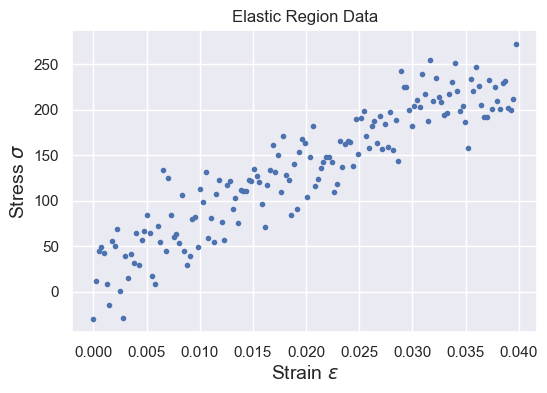

In [30]:
# Overall Data
X = data[:, 0][:, None]
Y = data[:, 1][:, None]

# Data for the elastic region
eps_l = 0.04 # strain upper limit for elastic region 
X_l = X[X < eps_l][:, None]
Y_l = Y[X < eps_l][:, None]

# Plot
fig, ax = plt.subplots(dpi=100)
ax.plot(X_l, Y_l, '.')
ax.set_xlabel('Strain $\epsilon$', fontsize = 14)
ax.set_ylabel('Stress $\sigma$', fontsize = 14)
plt.title('Elastic Region Data');

Calculate Design Matrix:

In [31]:
# Design Matrix
phi_l = Basisfun()
Phi_l = compute_design_matrix(X_l, phi_l)

Hyper-parameters $\alpha$ and $\sigma$ estimation using evidence approximation:

In [32]:
# Set up the optimization routine and minimize the negative log evidence. 
from scipy.optimize import minimize

# Optmization using "BFGS" algorithm
bnds = ((1e-12, None), (1e-12, None)) # bounds on alpha and beta
optima_l =  minimize(neglogevidence, x0 = (1,1), args =(Phi_l,Y_l), method='L-BFGS-B', bounds=bnds)

# Optimization Results
print(optima_l.message)
print('Status: ', optima_l.status)
x_opt_l = optima_l.x
fun_opt = optima_l.fun
alpha_l = x_opt_l[0]
beta_l =  x_opt_l[1]
sigma2_l = 1./beta_l
print('Optimum alpha: ', alpha_l)
print('Optimum beta: ', beta_l)
print('Optimum sigma2: ', sigma2_l)

b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
Status:  0
Optimum alpha:  2.2312163384780023e-08
Optimum beta:  0.0011535878227986254
Optimum sigma2:  866.8607454385063


Poterior mean and varaince of $E$:

In [33]:
# Posterior mean and variance 
post_m_l, post_cov_l = postmeanvar(alpha_l, sigma2_l, Phi_l, Y_l)
print('Posterior Mean : ', post_m_l.item())
print('Posterior Variance:', post_cov_l.item())

Posterior Mean :  6446.171247290698
Posterior Variance: 10315.987640239993


So the posterior on $E$ is:
$$
p(E|\mathcal{D},\sigma,\alpha) \sim \mathcal{N}(E|6446.17, 10315.98)
$$
And, the plot can be seen below.

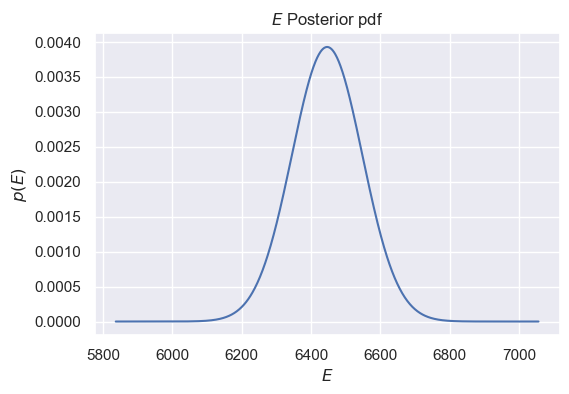

In [34]:
# Poterior Plot
mean = post_m_l[0][0]
std = np.sqrt(post_cov_l[0][0])
post_E = st.norm(loc=mean, scale=std) #  Posterior Normal Varaible

x = np.linspace(mean-6*std, mean+6*std, 1000)
plt.figure(dpi=100)
plt.plot(x, post_E.pdf(x))
plt.xlabel('$E$')
plt.ylabel('$p(E)$')
plt.title('$E$ Posterior pdf');

Visualizing epistemic and aleatory uncertainty about the stress-strain curve in the elastic regime:

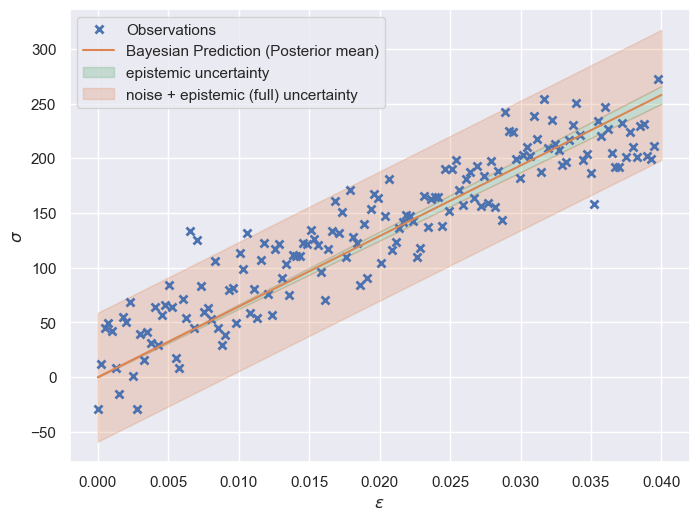

In [35]:
# Posterior predictive distribution.
X_p = np.linspace(0,eps_l, 100)[:, None]
Phi_p = compute_design_matrix(X_p, phi_l)
Y_p = np.dot(Phi_p, post_m_l).flatten() # The mean prediction
V_p_ep = np.einsum('ij,jk,ik->i', Phi_p, post_cov_l, Phi_p) # The epistemic uncertainty
S_p_ep = np.sqrt(V_p_ep)
V_p = V_p_ep + sigma2_l # Full uncertainty
S_p = np.sqrt(V_p)
Y_l_ep = Y_p - 2. * S_p_ep  # Lower epistemic predictive bound
Y_u_ep = Y_p + 2. * S_p_ep  # Upper epistemic predictive bound
Y_l_t = Y_p - 2. * S_p # Lower predictive bound
Y_u_t = Y_p + 2. * S_p # Upper predictive bound

# Plot
fig, ax = plt.subplots(figsize=(8,6),dpi=100)
ax.plot(X_l.flatten(), Y_l.flatten(), 'x', markeredgewidth=2, label='Observations')
ax.plot(X_p, Y_p, label='Bayesian Prediction (Posterior mean)')
ax.fill_between(X_p.flatten(), Y_l_ep, Y_u_ep, color=sns.color_palette()[2], alpha=0.25,  label = 'epistemic uncertainty')
ax.fill_between(X_p.flatten(), Y_l_t, Y_l_ep, color=sns.color_palette()[1], alpha=0.25, label = 'noise + epistemic (full) uncertainty')
ax.fill_between(X_p.flatten(), Y_u_ep, Y_u_t, color=sns.color_palette()[1], alpha=0.25)
ax.set_xlabel('$\epsilon$')
ax.set_ylabel('$\sigma$')
plt.legend(loc='upper left');

**Five plausible samples of the linear stress-strain curve and their visualization:**

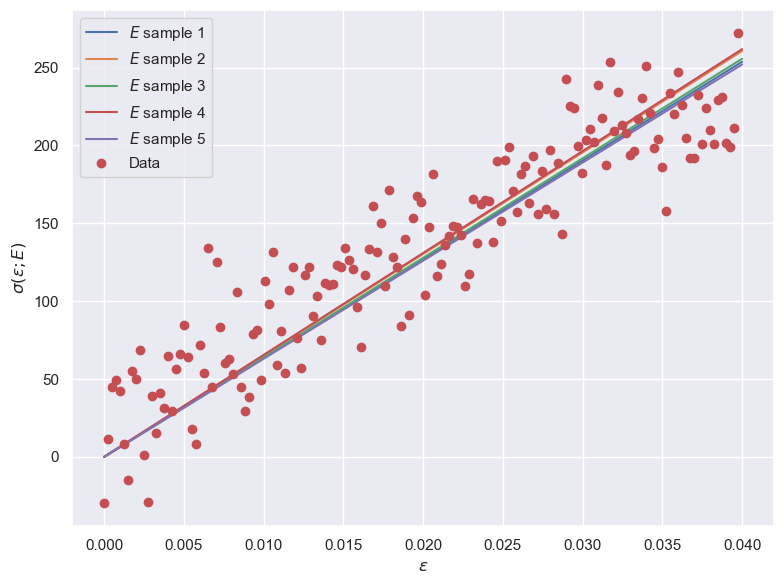

In [36]:
# Samples from posterior 
nsamples = 5
E_samples = post_E.rvs(nsamples)

# Visualization
fig, ax = plt.subplots(figsize=(8,6),dpi=100)
x = np.linspace(0, eps_l, 100)
for i in range(nsamples):
    plt.plot(x, E_samples[i]*x, label=f'$E$ sample {i+1}')
plt.plot(X_l.flatten(), Y_l.flatten(), 'ro', label = 'Data')
plt.xlabel('$\epsilon$')
plt.ylabel('$\sigma(\epsilon;E)$')
plt.legend(loc='best')
# plt.legend(loc='center right', bbox_to_anchor=(1.25,0.5))
plt.tight_layout()

### Part B
Now, come up with a generalized linear model that can capture the non-linear part of the stress-strain relation.
Remember, you can use any model you want as soon as:
+ it is linear in the parameters to be estimated,
+ it clearly has a well-defined elastic regime (see Part A).

Use your model to:
+ Derive, compute, and visualize a probabilistic estimate of the peak of the stress-strain curve (the so-called *yield stress*). This is not necessarily going to be Gaussian or even analytically available;
+ Visualize your epistemic and aleatory uncertainty about the stress-strain curve.
+ Take five plaussible samples of the linear stress-strain curve and visualize them.

In your answer, you should first clearly describe your model in text using the notation of the lectures and then code the solution.

*Hint: You can use the Heavide step function to turn on or off models for various ranges of $\epsilon$. The idea is quite simple. Here is a model that has the right form in the elastic regime and an arbitrary form in the non-linear regime:*
$$
f(\epsilon) = E\epsilon \left[(1 - H(\epsilon - \epsilon_l)\right] + g(\epsilon;\mathbf{w}_g)H(\epsilon - \epsilon_l),
$$
where
$$
H(x) = \begin{cases}
0,\;\text{if}\;x < 0\\
1,\;\text{otherwise}.
\end{cases}
$$

**Solution:**

**Model form in the non-linear region:**

Here the polynomial of $10^{th}$ degree order will be used to fit the non-linear part of the stress-strain curve. So,
$$
g(\epsilon) = \sum_{i=0}^{10} w_{i}\epsilon^{i}
$$
So based on this and part A, the complete stress-strain model can be represented using Heavide step function as:
$$
f(\epsilon) =
\begin{cases}
E\epsilon,\; \epsilon < \epsilon_l\\
\sum_{i=0}^{10} w_{i}\epsilon^{i},\;\epsilon \geq \epsilon_l
\end{cases}
$$
So,

+ Model the non-linear data using some fixed basis as:
\begin{gather*}
y(x;\mathbf{w}) = \mathbf{w}^T \boldsymbol{\phi}(x)\\
\text{where } y \equiv \sigma  \in \mathbb{R} \text{ [stress (output/label)]; }\\
x \equiv \epsilon  \in \mathbb{R} \text{ [strain (input)]; }\\
\boldsymbol{\phi}(x) \in \mathbb{R}^M \text{ [polynomial basis function]}\\
\mathbf{w} \in \mathbb{R}^M \text{ [model parameter]; } \\
\end{gather*}
Also,
\begin{gather*}
\mathbf{y}(\mathbf{x};w) = \boldsymbol{\Phi} \mathbf{w} \\
\text{where } \mathbf{y}\in\mathbb{R}^N \text{(outputs or target variables) ;} \boldsymbol{\Phi} \in \mathbb{R}^{N \times M} \text{(design matrix)}
\end{gather*}
And, here $M=11$

Now, here also, similar to previous part, assuming the Gaussian likelihood on data measurements, prior on model parameters with individual precision for each parameter, and prior on hyper-parameters, we will use the Bayesian linear regression with Automatic Relevance Determination to estimate the model parameters and model prediction with uncertainties. 

In [37]:
# Class for the polynomials:
class PolynomialBasis(object):
    """
    A set of linear basis functions.
    
    Arguments:
    degree  -  The degree of the polynomial.
    """
    def __init__(self, degree):
        self.degree = degree
        self.num_basis = degree + 1
    def __call__(self, x):
        return np.array([x[0] ** i for i in range(self.degree + 1)])

Non-linear region data:

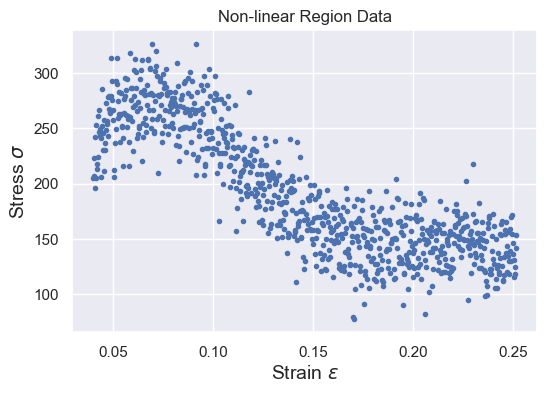

In [38]:
# Data for the non-linear region
X_n = X[X >= eps_l][:, None]
Y_n = Y[X >= eps_l][:, None]

# Plot
fig, ax = plt.subplots(dpi=100)
ax.plot(X_n, Y_n, '.')
ax.set_xlabel('Strain $\epsilon$', fontsize = 14)
ax.set_ylabel('Stress $\sigma$', fontsize = 14)
plt.title('Non-linear Region Data');

Design Matrix:

In [39]:
# Design Matrix
degree = 10
phi_n = PolynomialBasis(degree)
Phi_n = compute_design_matrix(X_n, phi_n)

**Automatic Relevance Determination:**

In [40]:
from sklearn.linear_model import ARDRegression
regressor = ARDRegression()
regressor.fit(Phi_n, Y_n.flatten())
# They are using different names:
sigma_n = np.sqrt(1. / regressor.alpha_)
print('best sigma:', sigma_n)
alpha_n = regressor.lambda_
print('best alpha:', alpha_n)
A = np.dot(Phi_n.T, Phi_n) / sigma_n ** 2. + alpha_n * np.eye(Phi_n.shape[1])
L = scipy.linalg.cho_factor(A)
post_m_n = scipy.linalg.cho_solve(L, np.dot(Phi_n.T, Y_n) / sigma_n ** 2)  # The posterior mean of w
post_cov_n = scipy.linalg.cho_solve(L, np.eye(Phi_n.shape[1]))           # The posterior covariance of w

best sigma: 23.403369998402788
best alpha: [1.00000000e+00 5.09651764e-09 3.44176947e-11 1.66669221e-12
 6.86036076e-13 1.00000011e+00 1.00000016e+00 1.00000005e+00
 1.00000001e+00 1.00000000e+00 1.00000000e+00]


Non-linear part postrior predictive distribution:

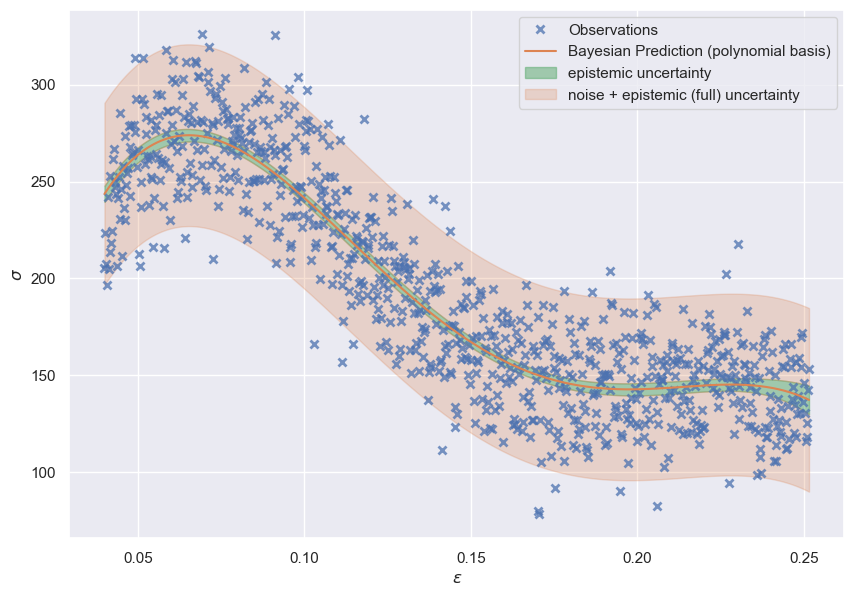

In [41]:
# Posterior predictive distribution.
X_p = np.linspace(eps_l,np.max(X_n), 1000)[:, None]
Phi_p = compute_design_matrix(X_p, phi_n)
Y_p = np.dot(Phi_p, post_m_n).flatten() # The mean prediction
V_p_ep = np.einsum('ij,jk,ik->i', Phi_p, post_cov_n, Phi_p) # The epistemic uncertainty
S_p_ep = np.sqrt(V_p_ep)
V_p = V_p_ep + sigma_n**2 # Full uncertainty
S_p = np.sqrt(V_p)
Y_l_ep = Y_p - 2. * S_p_ep  # Lower epistemic predictive bound
Y_u_ep = Y_p + 2. * S_p_ep  # Upper epistemic predictive bound
Y_l_t = Y_p - 2. * S_p # Lower predictive bound
Y_u_t = Y_p + 2. * S_p # Upper predictive bound

# Plot
fig, ax = plt.subplots(figsize=(10,7),dpi=100)
ax.plot(X_n.flatten(), Y_n.flatten(), 'x', alpha= 0.75, markeredgewidth=2, label='Observations')
ax.plot(X_p, Y_p, label='Bayesian Prediction (polynomial basis)')
ax.fill_between(X_p.flatten(), Y_l_ep, Y_u_ep, color=sns.color_palette()[2], alpha=0.5,  label = 'epistemic uncertainty')
ax.fill_between(X_p.flatten(), Y_l_t, Y_l_ep, color=sns.color_palette()[1], alpha=0.25, label = 'noise + epistemic (full) uncertainty')
ax.fill_between(X_p.flatten(), Y_u_ep, Y_u_t, color=sns.color_palette()[1], alpha=0.25)
ax.set_xlabel('$\epsilon$')
ax.set_ylabel('$\sigma$')
plt.legend(loc='upper right');

**Epistemic and aleatory uncertainty plot about the stress-strain curve:**

In [42]:
X_p = np.linspace(0,np.max(X_n), 1000)[:, None]
X_p_l = X_p[X_p < eps_l]

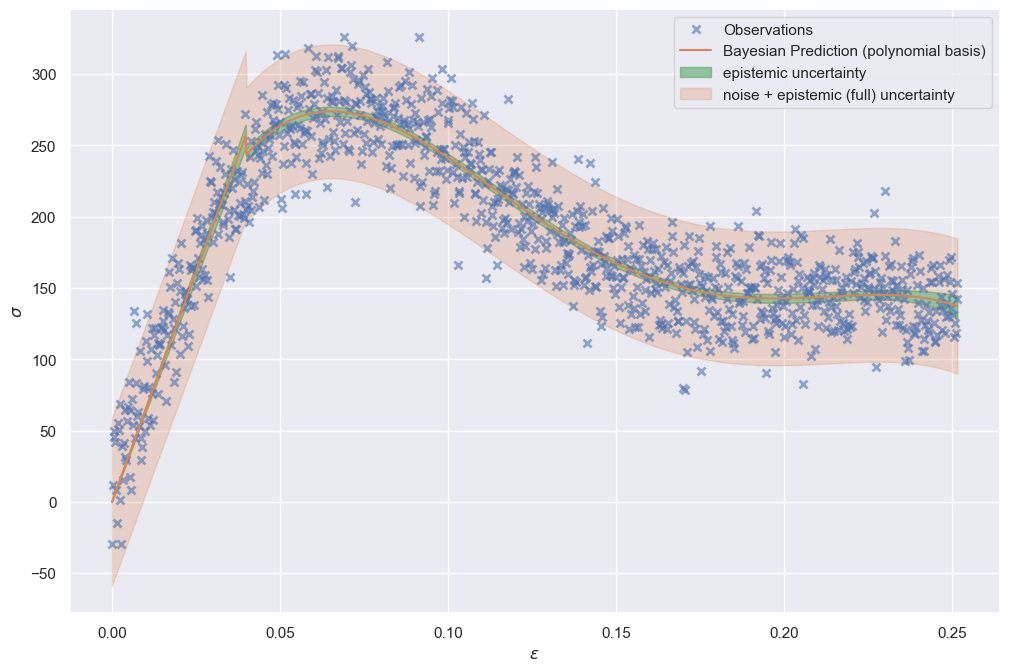

In [43]:
# Total Posterior predictive distribution.
X_p = np.linspace(0,np.max(X_n), 1000)
# Linear part
X_p_l = X_p[X_p < eps_l][:,None]
Phi_p_l = compute_design_matrix(X_p_l, phi_l)
Y_p_l = np.dot(Phi_p_l, post_m_l).flatten() # The mean prediction
V_p_ep_l = np.einsum('ij,jk,ik->i', Phi_p_l, post_cov_l, Phi_p_l) # The epistemic uncertainty
S_p_ep_l = np.sqrt(V_p_ep_l)
V_p_l = V_p_ep_l + sigma2_l # Full uncertainty
S_p_l = np.sqrt(V_p_l)
Y_l_ep_l = Y_p_l - 2. * S_p_ep_l  # Lower epistemic predictive bound
Y_u_ep_l = Y_p_l + 2. * S_p_ep_l  # Upper epistemic predictive bound
Y_l_t_l = Y_p_l - 2. * S_p_l # Lower predictive bound
Y_u_t_l = Y_p_l + 2. * S_p_l # Upper predictive bound

# Non-Linear part
X_p_n = X_p[X_p >= eps_l][:,None]
Phi_p_n = compute_design_matrix(X_p_n, phi_n)
Y_p_n = np.dot(Phi_p_n, post_m_n).flatten() # The mean prediction
V_p_ep_n = np.einsum('ij,jk,ik->i', Phi_p_n, post_cov_n, Phi_p_n) # The epistemic uncertainty
S_p_ep_n = np.sqrt(V_p_ep_n)
V_p_n = V_p_ep_n + sigma_n**2 # Full uncertainty
S_p_n = np.sqrt(V_p_n)
Y_l_ep_n = Y_p_n - 2. * S_p_ep_n  # Lower epistemic predictive bound
Y_u_ep_n = Y_p_n + 2. * S_p_ep_n  # Upper epistemic predictive bound
Y_l_t_n = Y_p_n - 2. * S_p_n # Lower predictive bound
Y_u_t_n = Y_p_n + 2. * S_p_n # Upper predictive bound

# Overall Data
Y_p = np.concatenate((Y_p_l, Y_p_n),axis=0) # The mean prediction
Y_l_ep = np.concatenate((Y_l_ep_l, Y_l_ep_n),axis=0)  # Lower epistemic predictive bound
Y_u_ep = np.concatenate((Y_u_ep_l, Y_u_ep_n))  # Upper epistemic predictive bound
Y_l_t = np.concatenate((Y_l_t_l, Y_l_t_n)) # Lower predictive bound
Y_u_t = np.concatenate((Y_u_t_l, Y_u_t_n)) # Upper predictive bound

# Plot
fig, ax = plt.subplots(figsize=(12,8),dpi=100)
ax.plot(X.flatten(), Y.flatten(), 'x', alpha= 0.6, markeredgewidth=2, label='Observations')
ax.plot(X_p, Y_p, label='Bayesian Prediction (polynomial basis)')
ax.fill_between(X_p.flatten(), Y_l_ep, Y_u_ep, color=sns.color_palette()[2], alpha=0.6,  label = 'epistemic uncertainty')
ax.fill_between(X_p.flatten(), Y_l_t, Y_l_ep, color=sns.color_palette()[1], alpha=0.25, label = 'noise + epistemic (full) uncertainty')
ax.fill_between(X_p.flatten(), Y_u_ep, Y_u_t, color=sns.color_palette()[1], alpha=0.25)
ax.set_xlabel('$\epsilon$')
ax.set_ylabel('$\sigma$')
plt.legend(loc='upper right');

 **Probabilistic estimate of the peak of the stress-strain curve (yield stress):**

 To estimate the probability, using the Monte Carlo approach, we will multiple samples and then estimate an empirical probability distribution function from those samples.

In [44]:
# function to sample overall model parameters
def overallmodelparametersample(m_l, S_l, m_nl, S_nl):
    """
    Function to sample overall model parameters from posterior
    """
    # Linear Part:
    rv = st.norm(loc=m_l, scale=np.sqrt(S_l))
    E = rv.rvs()
    # Non-linear Part: 
    rv = st.multivariate_normal(mean = m_nl, cov = S_nl)
    w_nl = rv.rvs()
    return [E, w_nl]

def overallmodeloutput(eps,params):
    """
    Function to calculate model output depending on the location of the input (linear or non-linear region)
    """
    E = params[0]
    w_nl = params[1]
    x_l = eps[eps < eps_l][:,None]
    x_nl = eps[eps >= eps_l][:,None]
    y_l = E*x_l
    Phi_nl = compute_design_matrix(x_nl, phi_n)
    y_nl = np.dot(Phi_nl,w_nl)
    y = np.concatenate((y_l.flatten(), y_nl.flatten()),axis=0)
    return y

In [45]:
# Sampling and calulating yield stress
# Posterior Information
# Linear Part
post_m_l = post_m_l.flatten()
post_cov_l = post_cov_l.flatten()
# Non-linear part
post_m_n = post_m_n.flatten()

nsamples = 6000
x = np.linspace(0, X.max(), 1000) # range of data x-axis
yieldstress = []
for i in range(nsamples):
    params = overallmodelparametersample(post_m_l,post_cov_l,post_m_n.flatten(),post_cov_n)
    stress = overallmodeloutput(x,params)
    yieldstress.append(stress.max())

In [46]:
yieldstress = np.array(yieldstress)
print('Yield Stress mean:', np.mean(yieldstress))
print('Yield Stress median:', np.median(yieldstress))
print('Yield Stress std:', np.std(yieldstress))


Yield Stress mean: 273.8765348235059
Yield Stress median: 273.88641649133035
Yield Stress std: 1.5957194623778297


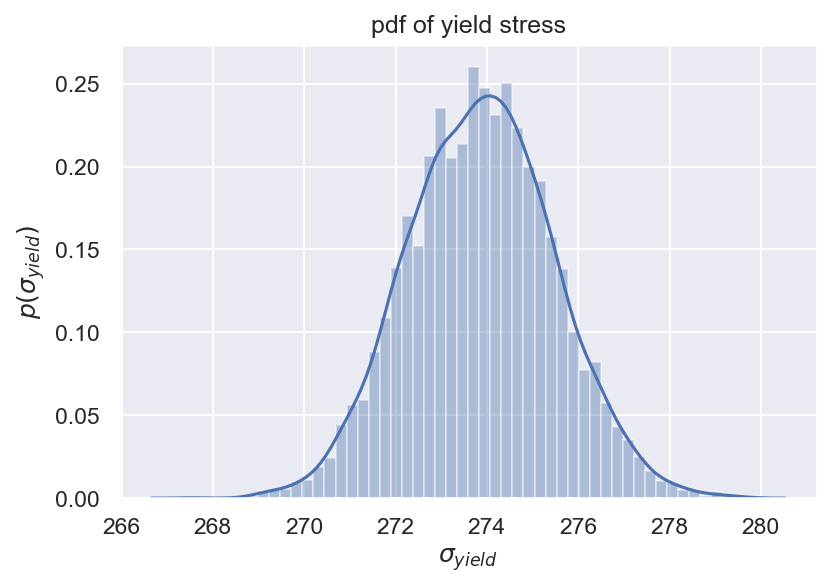

In [47]:
# Plot Histogram
fig, ax = plt.subplots(dpi=150)
sns.distplot(yieldstress, kde=True, bins = 50, ax = ax)
ax.set_xlabel('$\sigma_{yield}$')
ax.set_ylabel('$p(\sigma_{yield})$')
plt.title('pdf of yield stress');

**Five plaussible samples of the stress-strain curve model and their visualization:**

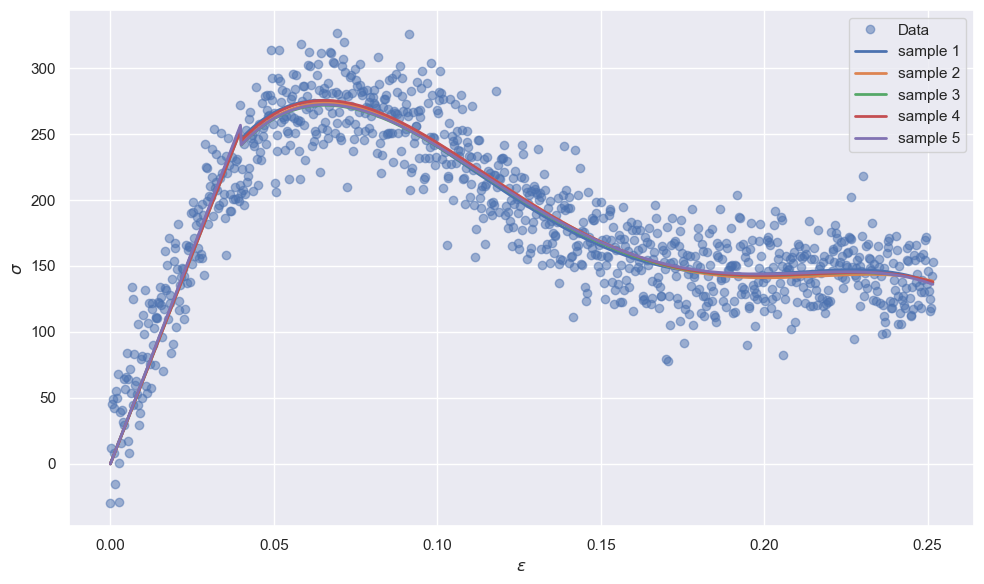

In [48]:
# Samples from posterior 
nsamples = 5

# Visualization
fig, ax = plt.subplots(figsize=(10,6),dpi=100)
plt.plot(X.flatten(), Y.flatten(), 'bo', label = 'Data', alpha = 0.5)
x = np.linspace(0, X.max(), 1000)
for i in range(nsamples):
    # Take Sample
    params = overallmodelparametersample(post_m_l,post_cov_l,post_m_n.flatten(),post_cov_n) 
    # plot sample
    plt.plot(x, overallmodeloutput(x,params), lw = 2, label=f'sample {i+1}')
plt.xlabel('$\epsilon$')
plt.ylabel('$\sigma$')
plt.legend(loc='best')
plt.tight_layout()

### Part C

The model you constructed in part B may have a discontinuity at $\epsilon=\epsilon_l$.
How can you enforce continuity of $\sigma(\epsilon)$ and its first derivative at that point?
Can you re-parameterize the model of part B, so that this condition is automatically satisfied?
If yes, then repeat the analysis of part B.

**Solution:**

To have a continuity of the $\sigma(\epsilon)$ curve and have its derivative at the $\epsilon_l$, the non-linear should have the same value as the linear part at $\epsilon_l$ and also the slope of the non-linear curve should be same as the linear part. As our overall model is:
$$
f(\epsilon) =
\begin{cases}
E\epsilon,\; \epsilon < \epsilon_l\\
\sum_{i=0}^{10} w_{i}\epsilon^{i},\;\epsilon \geq \epsilon_l
\end{cases}
$$
So for continuity we should have,
$$
E\epsilon_l = \sum_{i=0}^{10} w_{i}\epsilon_l^{i}
$$
and for first derivative we should have,
$$
E = \sum_{i=1}^{10} iw_{i}\epsilon_l^{i-1}
$$
So, from the above two equations which provide the necessary constraints for continuity and 1st order derivate, we can calculate two of the parameters. Let's define $w_0$ and $w_1$ in the form of other parameters and $\epsilon_l$.

From the first equation we get $w_0$ as,
$$
w_0 = E\epsilon_l - \left( \sum_{i=1}^{10} w_{i}\epsilon_l^{i} \right)
$$
and from second equation we get $w_1$ as,
$$
w_1 = E - \left(\sum_{i=2}^{10} iw_{i}\epsilon_l^{i-1}\right)
$$
Substituting $w_1$ in the $w_0$ equation we get,
\begin{align*}
w_0 &= E\epsilon_l - \left(E - \left(\sum_{i=2}^{10} iw_{i} \epsilon_l^{i-1} \right) \right) \epsilon_l - \left( \sum_{i=2}^{10} w_{i}\epsilon_l^{i} \right) \\
&= \sum_{i=2}^{10} iw_{i}\epsilon_l^{i} - \sum_{i=2}^{10} w_{i}\epsilon_l^{i}\\
\Rightarrow w_0 &= \sum_{i=2}^{10} (i-1) w_{i}\epsilon_l^{i}
\end{align*}
So the function in the non-linear region becomes:
\begin{align*}
g(\epsilon) &= \sum_{i=0}^{10} w_{i}\epsilon^{i} = w_0 + w_1\epsilon + \sum_{i=2}^{10} w_{i}\epsilon^{i} \\
&= \sum_{i=2}^{10} (i-1) w_{i}\epsilon_l^{i} + \left(E - \left(\sum_{i=2}^{10} iw_{i}\epsilon_l^{i-1}\right)\right) \epsilon + \sum_{i=2}^{10} w_{i}\epsilon^{i} \\
&= E\epsilon + \sum_{i=2}^{10} w_i \left( (i-1)\epsilon_l^{i} - i\epsilon_l^{i-1} \epsilon + \epsilon^{i} \right)
\end{align*}
So the overall model becomes,
$$
f(\epsilon) =
\begin{cases}
E\epsilon,\; \epsilon < \epsilon_l\\
E\epsilon + \sum_{i=2}^{10} w_i \left( (i-1)\epsilon_l^{i} - i\epsilon_l^{i-1} \epsilon + \epsilon^{i} \right),\;\epsilon \geq \epsilon_l
\end{cases}
$$
which is continuous and also 1st order derivative at $\epsilon_l$.

Now as we can see from the above expression that the model parameters for the non-linear region are $\begin{bmatrix}E & w_2 & w_3 & \dots & w_{10}\end{bmatrix}$ which we can estimate using Bayesian linear regression with generalized linear model on the non-linear region data. We can either estimate the $E$ using the linear region data or we can also estimate it using non-linear data with other parameters which will also define the linear region. We will use the later approach.


**Bayesian Linear Regression on non-linear region data:**

Now we will define the basis function based on the above non-linear region model form:

In [49]:
# Class for the basis function:
class Basisfunction(object):
    """
    A set of basis functions based on the above form.
    
    Arguments:
    degree  -  The degree of the polynomial.
    """
    def __init__(self, degree):
        self.degree = degree
        self.num_basis = degree
    def __call__(self, x):
        return np.array([x[0]]+[((i-1)*eps_l**i - i*eps_l**(i-1)*x[0] + x[0]**i) for i in range(2, self.degree + 1)])

Design matrix :

In [50]:
# Design Matrix
degree = 10
phi = Basisfunction(degree)
Phi = compute_design_matrix(X_n, phi)

**Automatic Relevance Determination:**

In [51]:
from sklearn.linear_model import ARDRegression
regressor = ARDRegression()
regressor.fit(Phi, Y_n.flatten())
# They are using different names:
sigma = np.sqrt(1. / regressor.alpha_)
print('best sigma:', sigma_n)
alpha = regressor.lambda_
print('best alpha:', alpha_n)
A = np.dot(Phi.T, Phi) / sigma ** 2. + alpha * np.eye(Phi.shape[1])
L = scipy.linalg.cho_factor(A)
post_m = scipy.linalg.cho_solve(L, np.dot(Phi.T, Y_n) / sigma ** 2)  # The posterior mean of parameters
post_cov = scipy.linalg.cho_solve(L, np.eye(Phi.shape[1]))           # The posterior covariance of parameters

best sigma: 23.403369998402788
best alpha: [1.00000000e+00 5.09651764e-09 3.44176947e-11 1.66669221e-12
 6.86036076e-13 1.00000011e+00 1.00000016e+00 1.00000005e+00
 1.00000001e+00 1.00000000e+00 1.00000000e+00]


Now, as we estimated the $E$ (Young's modulus) using the non-linear region data as it is the first parameter in the above regression results. We will plot the $E$ posterior pdf by getting mean and variance from the 1st data of the mean vector and covariance matrix. 

E Posterior Mean :  5205.199510648729
E Posterior Variance: 1403.985391670003


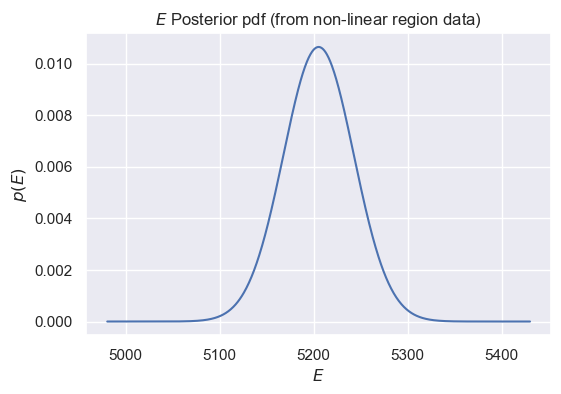

In [52]:
# Poterior Plot
mean = post_m[0][0]
std = np.sqrt(post_cov[0][0])
post_E = st.norm(loc=mean, scale=std) #  Posterior Normal Varaible

print('E Posterior Mean : ', mean)
print('E Posterior Variance:', std**2)

x = np.linspace(mean-6*std, mean+6*std, 1000)
plt.figure(dpi=100)
plt.plot(x, post_E.pdf(x))
plt.xlabel('$E$')
plt.ylabel('$p(E)$')
plt.title('$E$ Posterior pdf (from non-linear region data)');

As we can see from the above plot that the $E$ posterior pdf based on non-linear region data is quite different compared to the one derived using linear region data. It has comparatively lower mean as well as variance value. 

**Non-linear region postrior predictive distribution:**

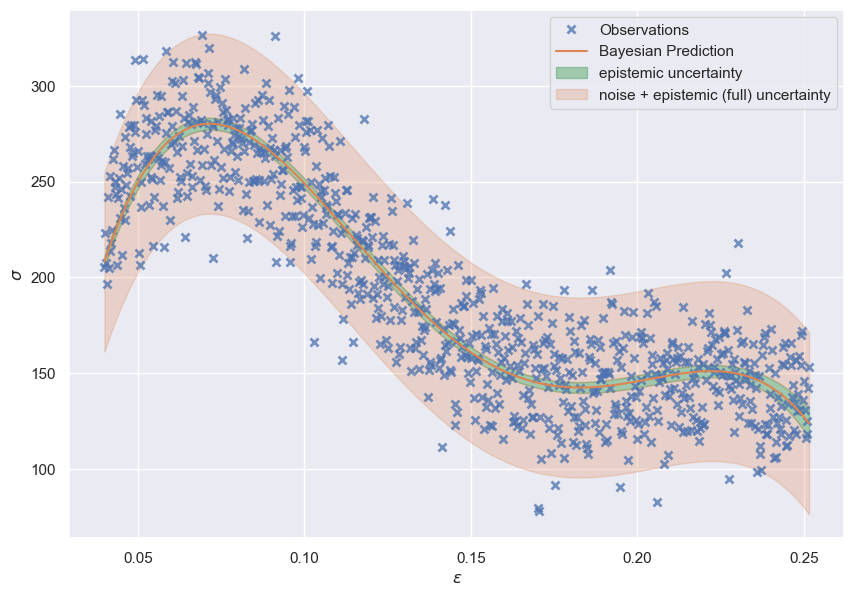

In [53]:
# Posterior predictive distribution.
X_p = np.linspace(eps_l,np.max(X_n), 1000)[:, None]
Phi_p = compute_design_matrix(X_p, phi)
Y_p = np.dot(Phi_p, post_m).flatten() # The mean prediction
V_p_ep = np.einsum('ij,jk,ik->i', Phi_p, post_cov, Phi_p) # The epistemic uncertainty
S_p_ep = np.sqrt(V_p_ep)
V_p = V_p_ep + sigma**2 # Full uncertainty
S_p = np.sqrt(V_p)
Y_l_ep = Y_p - 2. * S_p_ep  # Lower epistemic predictive bound
Y_u_ep = Y_p + 2. * S_p_ep  # Upper epistemic predictive bound
Y_l_t = Y_p - 2. * S_p # Lower predictive bound
Y_u_t = Y_p + 2. * S_p # Upper predictive bound

# Plot
fig, ax = plt.subplots(figsize=(10,7),dpi=100)
ax.plot(X_n.flatten(), Y_n.flatten(), 'x', alpha= 0.75, markeredgewidth=2, label='Observations')
ax.plot(X_p, Y_p, label='Bayesian Prediction')
ax.fill_between(X_p.flatten(), Y_l_ep, Y_u_ep, color=sns.color_palette()[2], alpha=0.5,  label = 'epistemic uncertainty')
ax.fill_between(X_p.flatten(), Y_l_t, Y_l_ep, color=sns.color_palette()[1], alpha=0.25, label = 'noise + epistemic (full) uncertainty')
ax.fill_between(X_p.flatten(), Y_u_ep, Y_u_t, color=sns.color_palette()[1], alpha=0.25)
ax.set_xlabel('$\epsilon$')
ax.set_ylabel('$\sigma$')
plt.legend(loc='upper right');

**Epistemic and aleatory uncertainty plot about the stress-strain curve:**

In [54]:
def modelmeanpred(eps,params):
    """
    Function to calculate model mean predicition depending on the location of the input (linear or non-linear region)
    """
    E = params[0]
    x_l = eps[eps < eps_l][:,None]
    y_l = E*x_l
    x_nl = eps[eps >= eps_l][:,None]
    w_nl = params
    Phi_nl = compute_design_matrix(x_nl, phi)
    y_nl = np.dot(Phi_nl,w_nl)
    y = np.concatenate((y_l.flatten(), y_nl.flatten()),axis=0)
    return y

def modelstdpred(eps,params):
    """
    Function to calculate model epistemic and full uncertainty predicition depending on the location of the input (linear or non-linear region)
    """
    post_cov = params[0]
    sigma = params[1]
    # linear region
    post_cov_l = np.array([[post_cov[0,0]]])
    x_l = eps[eps < eps_l][:,None]
    Phi_l = compute_design_matrix(x_l, phi_l)
    V_ep_l = np.einsum('ij,jk,ik->i', Phi_l, post_cov_l, Phi_l) # The epistemic uncertainty
    S_ep_l = np.sqrt(V_ep_l)
    V_l = V_ep_l + sigma**2 # Full uncertainty
    S_l = np.sqrt(V_l)
    # non-linear region
    x_nl = eps[eps >= eps_l][:,None]
    Phi_nl = compute_design_matrix(x_nl, phi)
    V_ep_nl = np.einsum('ij,jk,ik->i', Phi_nl, post_cov, Phi_nl) # The epistemic uncertainty
    S_ep_nl = np.sqrt(V_ep_nl)
    V_nl = V_ep_nl + sigma**2 # Full uncertainty
    S_nl = np.sqrt(V_nl)
    # overall region
    S_ep = np.concatenate((S_ep_l.flatten(), S_ep_nl.flatten()),axis=0)
    S = np.concatenate((S_l.flatten(), S_nl.flatten()),axis=0)
    return S_ep, S

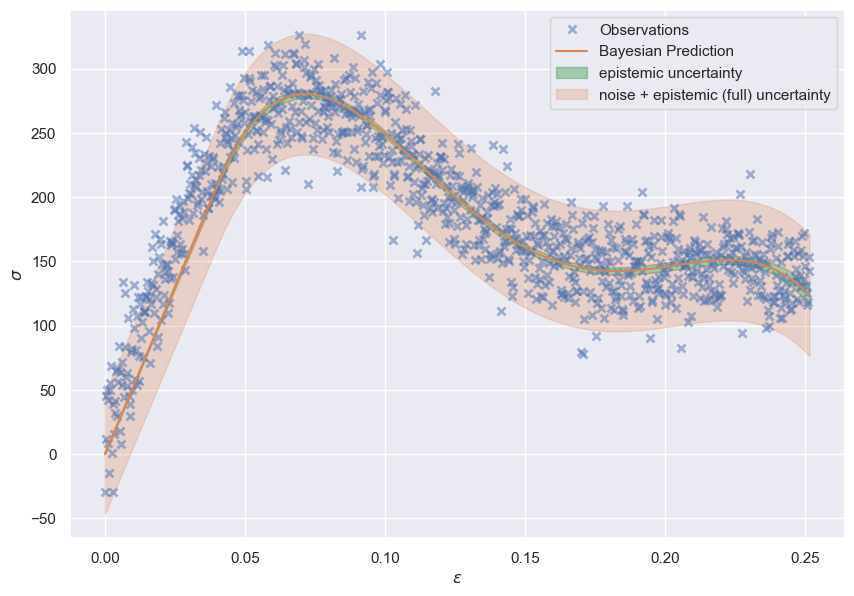

In [55]:
# Posterior predictive distribution.
X_p = np.linspace(0,np.max(X_n), 1000)[:, None]
Y_p = modelmeanpred(X_p, post_m).flatten() # The mean prediction
S_p_ep, S_p = modelstdpred(X_p,[post_cov, sigma])
Y_l_ep = Y_p - 2. * S_p_ep  # Lower epistemic predictive bound
Y_u_ep = Y_p + 2. * S_p_ep  # Upper epistemic predictive bound
Y_l_t = Y_p - 2. * S_p # Lower predictive bound
Y_u_t = Y_p + 2. * S_p # Upper predictive bound

# Plot
fig, ax = plt.subplots(figsize=(10,7),dpi=100)
ax.plot(X.flatten(), Y.flatten(), 'x', alpha= 0.5, markeredgewidth=2, label='Observations')
ax.plot(X_p, Y_p, label='Bayesian Prediction')
ax.fill_between(X_p.flatten(), Y_l_ep, Y_u_ep, color=sns.color_palette()[2], alpha=0.5,  label = 'epistemic uncertainty')
ax.fill_between(X_p.flatten(), Y_l_t, Y_l_ep, color=sns.color_palette()[1], alpha=0.25, label = 'noise + epistemic (full) uncertainty')
ax.fill_between(X_p.flatten(), Y_u_ep, Y_u_t, color=sns.color_palette()[1], alpha=0.25)
ax.set_xlabel('$\epsilon$')
ax.set_ylabel('$\sigma$')
plt.legend(loc='upper right');

The above plot shows the epistemic and full uncertainty with the mean prediction of the model whose parameters are derived using only the non-linear region data with constraint of continuity and 1st order derivative at $\epsilon_l$. As we can see that in the linear region here the prediction is slightly shifted below compared to prediction results of using only linear-region data in regression. 

**Probabilistic estimate of the peak of the stress-strain curve (yield stress):**

 To estimate the probability, using the Monte Carlo approach, we will multiple samples and then estimate an empirical probability distribution function from those samples.

In [56]:
# Sampling and calulating yield stress
# Posterior: Multivariate random normal variable
rv = st.multivariate_normal(mean = post_m.flatten(), cov = post_cov)

nsamples = 6000
x = np.linspace(0, X.max(), 1000) # range of data x-axis
yieldstress = []
for i in range(nsamples):
    params = rv.rvs()
    stress = modelmeanpred(x,params)
    yieldstress.append(stress.max())

In [57]:
yieldstress = np.array(yieldstress)
print('Yield Stress mean:', np.mean(yieldstress))
print('Yield Stress median:', np.median(yieldstress))
print('Yield Stress std:', np.std(yieldstress))

Yield Stress mean: 280.19739757432995
Yield Stress median: 280.2062210063291
Yield Stress std: 1.5623695232753592


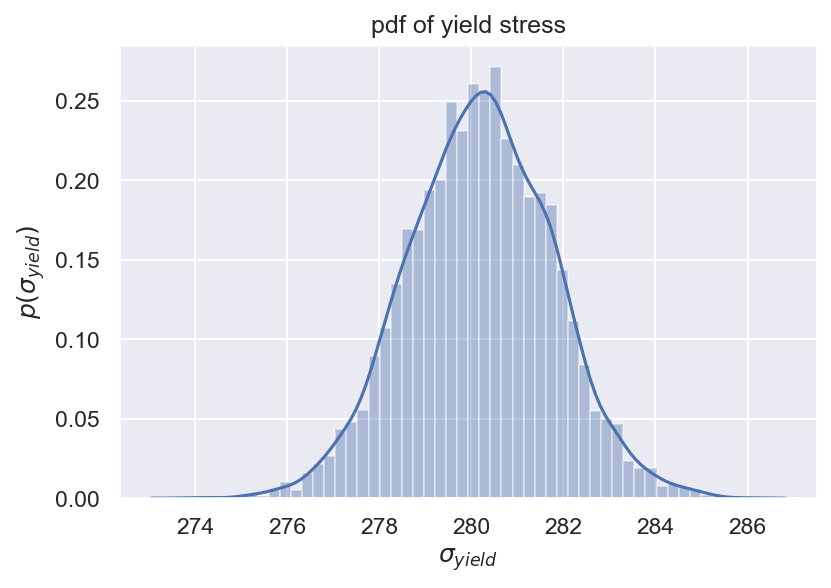

In [58]:
# Plot Histogram
fig, ax = plt.subplots(dpi=150)
sns.distplot(yieldstress, kde=True, bins = 50, ax = ax)
ax.set_xlabel('$\sigma_{yield}$')
ax.set_ylabel('$p(\sigma_{yield})$')
plt.title('pdf of yield stress');

As we can see from above plot that compared to the yield stress pdf estimate in part B, the yield stress pdf estimated here have a higher mean value with similar variance.

**Five plausible samples of the stress-strain curve model and their visualization:**

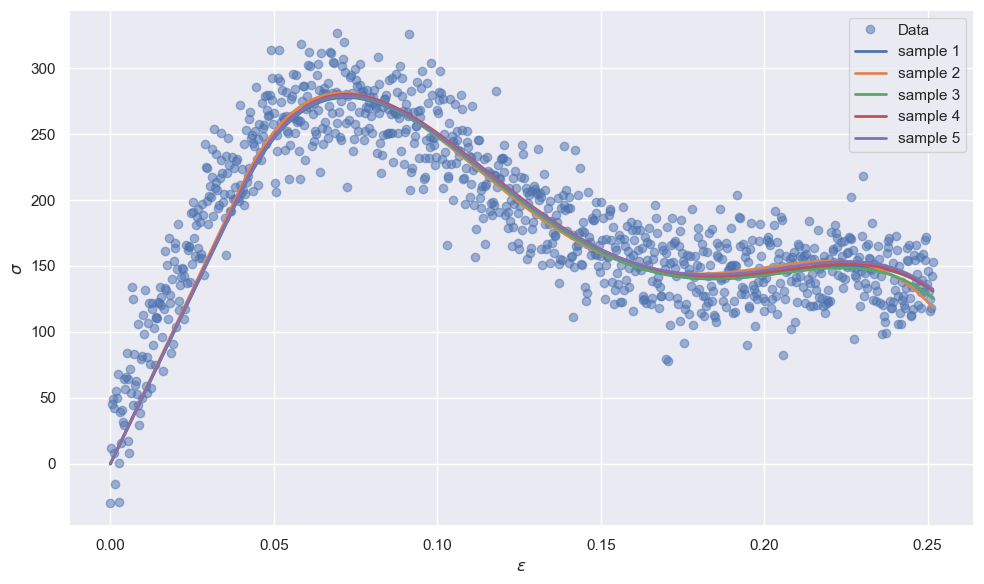

In [59]:
# Samples from posterior 
nsamples = 5

# Multivariate random normal varaible
rv = st.multivariate_normal(mean = post_m.flatten(), cov = post_cov)

# Visualization
fig, ax = plt.subplots(figsize=(10,6),dpi=100)
plt.plot(X.flatten(), Y.flatten(), 'bo', label = 'Data', alpha = 0.5)
x = np.linspace(0, X.max(), 1000)
for i in range(nsamples):
    # Take Sample
    params = rv.rvs()
    # plot sample
    plt.plot(x, modelmeanpred(x,params), lw = 2, label=f'sample {i+1}')
plt.xlabel('$\epsilon$')
plt.ylabel('$\sigma$')
plt.legend(loc='best')
plt.tight_layout()

-End-